The notebook implements a loan elgibility prediction system using a veriety of ML models such as (Random Forest, XGBoost, LightGBM, etc.), and deep learning architecutures (MLP, TabTransformers). It also includes utility functions for preporocessing and model evalition and generating human understandable explanations for decisions.

**Objective**:
To predict whether loan applicants are eligible for specific loan types(7(a), Express, 504 and 8(a)) using vareity of features including Business stability Financial Metrics and Categorical attributes.

**This notebook includes**:


*  **Data Preprocessing**
*  **Feature Selection**
*  **Multi-label classification models**
*  **Deep learning using PyTorch (Transformer-based model)**
*  **Evaluation using classification metrics**
*  **Explainability for predictions**

In [ ]:
#!pip install torch_optimizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [ ]:
#!pip install xgboost

In [ ]:
#!pip install lightgbm

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.multiclass import OneVsRestClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler
import warnings
from sklearn.metrics import classification_report
from scipy.stats import loguniform
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
import random
import tensorflow as tf
from scipy.stats import loguniform
import joblib
import ast

In [ ]:
#pip install openpyxl

In [ ]:
df = pd.read_excel("new_merged_shuffled - Copy.xlsx")
df

Applicant ID      Business Structure Country               Location  \
0             20507                     Ltd      US   Lake Nicolemouth, MT   
1             19975     Sole Proprietorship      US          Brownbury, IA   
2             66073             Partnership      US        Eugenehaven, HI   
3            108126                     LLC      US   West Christopher, NH   
4             53985                     LLC      US      South Heather, KY   
...             ...                     ...     ...                    ...   
77479         48117               Franchise      US      Lake Joseberg, NJ   
77480        100392               Franchise      US    North Jasonberg, SD   
77481         88803                     Inc      US    Christophertown, VI   
77482          6726  S Corporation (S-Corp)      US        Ericborough, MI   
77483           128     Sole Proprietorship      US  West Patriciaview, VA   

        NAICS  Business Ownership (1)  Business Ownership (2)  \
0      567652                      50                      50   
1      627811                     100                       0   
2      431461                      50                      50   
3      517652                     100                       0   
4      753837                      20                      20   
...       ...                     ...                     ...   
77479  655502                      20                      20   
77480  726960                     100                       0   
77481  995684                      33                      33   
77482  157531                      50                      50   
77483  512086                     100                       0   

       Business Ownership (3)  Business Ownership (4)  Business Ownership (5)  \
0                           0                       0                       0   
1                           0                       0                       0   
2                           0                       0                       0   
3                           0                       0                       0   
4                          20                      20                      20   
...                       ...                     ...                     ...   
77479                      20                      20                      20   
77480                       0                       0                       0   
77481                      33                       0                       0   
77482                       0                       0                       0   
77483                       0                       0                       0   

       ...  Equipment Purchase or Leasing  Inventory Purchase  \
0      ...                          False                True   
1      ...                           True               False   
2      ...                          False                True   
3      ...                           True               False   
4      ...                           True               False   
...    ...                            ...                 ...   
77479  ...                           True               False   
77480  ...                           True                True   
77481  ...                           True                True   
77482  ...                          False                True   
77483  ...                           True               False   

       Real Estate Acquisition or Improvement  Business Acquisition or Buyout  \
0                                        True                            True   
1                                        True                            True   
2                                       False                            True   
3                                        True                           False   
4                                        True                            True   
...                                       ...    

The `check_loan_eligibility` function is designed to assess loan eligibility for each applicant in the DataFrame based on specific rules associated with different **Small Business Administration(SBA)** loan types: `7(a)`,`8(a)`,`504`, and `Express`.

**What it does?** <br>
`determine_eligibility(row)` is a nested function that evaluates a single applicant for eligibility based on business and financial criteria. The function is applied row-wise resulting in loan types that can be stored in the column "Eligibility". The applicant may qualify for one or more loan types.

Each row in the DataFrame pulls:

*  Personal and Business credit score
*  Debt service coverage ratio (DSCR)
*  Annual revenue, NOI
*  Years in business, experience levels
*  Loan amount and purpose flags(booleans)

`purpose`checks **Checks Loan Purposes**. It scans through a list of valid loan purposes like "Working Captial", "Inventory Purchase", etc. to confirm that the loan has a qualifying purpose.

**Evaluation of Four Loan Types with Hard-Coded Criteria**

* **SBA 7(a) Loan**
* For-profit only
* Minimum credit scores and DSCR
* Loan amount between $500,001 and $5 Million
* Not for real estate or emergency funds

* **SBA 8(a) Loan**
* For non-profits only
* No fast approval
* 2+ years of business and experience
* Not for franchise or line-of-credit loans

**SBA 504 Loan**
* For-profit only
* Focus on **real estate or equipment**
* Profitable businesses with NOI < $6.5 Million
* Not for working capital or refinancing

**SBA Express Loan**
* For-profit
* Fast approval
* Small loans (<= $500K)
* Not for real estate or buyouts

**Ineligible** label is for the applicant who does not qualify for any of these loan types



In [ ]:
import pandas as pd

def check_loan_eligibility(df):
    """
    Determines the loan eligibility for each applicant based on specific criteria.
    Adds a new column 'Eligibility' to indicate which loans are eligible, or marks as 'Ineligible'.
    """

    def determine_eligibility(row):
        eligible_loans = []

        # Extract necessary fields from the current row
        personal_credit_score = row["Personal Credit Score"]
        business_credit_score = row["Business Credit Score"]
        dscr_latest = row["DSCR (latest year)"]
        annual_revenue_latest = row["Annual Revenue (latest year)"]
        years_in_business = row["Years in Business"]
        collateral_available = row["Collateral Availability"]
        loan_amount = row["Loan Amount"]
        fast_approval = row["Fast Approval"]
        net_profit_margin = row["Net Profit Margin"]
        average_noi_last_2_years = (row["NOI (2 years ago)"] + row["NOI (1 year ago)"]) / 2
        industry_exp = row["Industry Experience"]
        mng_exp = row["Managerial Experience"]

        # List of loan purposes, used for eligibility checks
        purposes = [
            "Working Capital", "Business Expansion", "Equipment Purchase or Leasing",
            "Inventory Purchase", "Real Estate Acquisition or Improvement",
            "Business Acquisition or Buyout", "Refinancing Existing Debt",
            "Emergency Funds", "Franchise Financing", "Contract Financing",
            "Licensing or Permits", "Line of Credit Establishment"
        ]

        # Check if the business has a valid purpose for the loan
        valid_purpose = any(row[p] for p in purposes)

        # Check eligibility for SBA 7(a) loan
        if (
            row["For Profit"]
            and personal_credit_score >= 680
            and business_credit_score >= 160
            and dscr_latest >= 1.15
            and years_in_business >= 2
            and 500001 <= loan_amount <= 5000000
            and valid_purpose
            and not row["Real Estate Acquisition or Improvement"]  # SBA 7(a) does not cover real estate
            and not row["Emergency Funds"]  # SBA 7(a) does not cover emergency funds
        ):
            eligible_loans.append("7(a)")

        # Check eligibility for SBA 8(a) loan
        if (
            row["For Profit"] == False
            and fast_approval == False
            and years_in_business >= 2
            and industry_exp >= 2
            and mng_exp >= 2
            and valid_purpose
            and not row["Franchise Financing"]  # Franchises aren't eligible for SBA 8(a)
            and not row["Line of Credit Establishment"]  # Not eligible if for credit line establishment
        ):
            eligible_loans.append("8(a)")

        # Check eligibility for SBA 504 loan
        if (
            row["For Profit"]
            and personal_credit_score >= 680
            and dscr_latest >= 1.15
            and average_noi_last_2_years < 6500000
            and net_profit_margin > 0  # The business needs to be profitable
            and years_in_business >= 2
            and loan_amount <= 5500000
            and collateral_available
            and (row["Real Estate Acquisition or Improvement"] or row["Equipment Purchase or Leasing"])  # Must be for real estate or equipment
            and not row["Working Capital"]  # SBA 504 doesn't cover working capital
            and not row["Refinancing Existing Debt"]  # SBA 504 doesn't cover debt refinancing
            and not row["Emergency Funds"]  # SBA 504 doesn't cover emergency funds
        ):
            eligible_loans.append("504")

        # Check eligibility for SBA Express loan
        if (
            row["For Profit"]
            and fast_approval
            and personal_credit_score >= 680
            and business_credit_score >= 160
            and dscr_latest >= 1.15
            and loan_amount <= 500000
            and valid_purpose
            and not row["Real Estate Acquisition or Improvement"]  # Not used for real estate purposes
            and not row["Business Acquisition or Buyout"]  # Not eligible for acquisitions
        ):
            eligible_loans.append("Express")

        # If no loan types matched, the applicant is marked as 'Ineligible'
        return eligible_loans if eligible_loans else ["Ineligible"]

    # Apply eligibility check to each row in the DataFrame
    df["Eligibility"] = df.apply(determine_eligibility, axis=1)

    return df  # Returns the updated DataFrame with eligibility results

updated_df = check_loan_eligibility(df)  # Apply eligibility check
print(updated_df.head())  # Display the first few results


   Applicant ID   Business Structure Country              Location   NAICS  \
0         20507                  Ltd      US  Lake Nicolemouth, MT  567652   
1         19975  Sole Proprietorship      US         Brownbury, IA  627811   
2         66073          Partnership      US       Eugenehaven, HI  431461   
3        108126                  LLC      US  West Christopher, NH  517652   
4         53985                  LLC      US     South Heather, KY  753837   

   Business Ownership (1)  Business Ownership (2)  Business Ownership (3)  \
0                      50                      50                       0   
1                     100                       0                       0   
2                      50                      50                       0   
3                     100                       0                       0   
4                      20                      20                      20   

   Business Ownership (4)  Business Ownership (5)  ...  Inventory Pu

In [ ]:
updated_df['Eligibility'].value_counts()

Eligibility
[Ineligible]      66487
[Express]          3853
[7(a)]             3054
[8(a)]             2006
[504]              1746
[7(a), 504]         212
[504, Express]      126
Name: count, dtype: int64

The function `safe_eval` ensures that the values in the `Eligibility` columns are safely converted to a stringified format.

**Why we need this**
When reading from CSVs or serializing, list values (like `["7(a)", "Express"]`) can become malformed strings. This function uses ast.`literal_eval()` to safely parse valid list-like strings, and converts everything back to a standardized string format. This also ensures and prevents issues with improper formatting or nested strings.


In [ ]:
def safe_eval(val):
    try:
        return str(ast.literal_eval(val)) if isinstance(val, str) else str(
            val)
    except (ValueError, SyntaxError):
        return str(str(val))  # Ensure every entry is a stringified list

# Apply the conversion
updated_df['Eligibility'] = updated_df['Eligibility'].apply(safe_eval)


In [ ]:
updated_df['Eligibility'].value_counts()

Eligibility
['Ineligible']        66487
['Express']            3853
['7(a)']               3054
['8(a)']               2006
['504']                1746
['7(a)', '504']         212
['504', 'Express']      126
Name: count, dtype: int64

In [ ]:
updated_df = updated_df[updated_df['Eligibility'] != "['8(a)']"]

In [ ]:
updated_df['Eligibility'].value_counts()

Eligibility
['Ineligible']        66487
['Express']            3853
['7(a)']               3054
['504']                1746
['7(a)', '504']         212
['504', 'Express']      126
Name: count, dtype: int64

In [ ]:
!pip install imbalanced-learn


In [ ]:
updated_df.columns

Index(['Applicant ID', 'Business Structure', 'Country', 'Location', 'NAICS',
       'Business Ownership (1)', 'Business Ownership (2)',
       'Business Ownership (3)', 'Business Ownership (4)',
       'Business Ownership (5)', 'Personal Credit Score',
       'Business Credit Score', 'Annual Revenue (2 years ago)',
       'Annual Revenue (1 year ago)', 'Annual Revenue (latest year)',
       'Net Profit Margin', 'Business Debt (2 years ago)',
       'Business Debt (1 year ago)', 'Business Debt (latest year)',
       'NOI (2 years ago)', 'NOI (1 year ago)', 'NOI (latest year)',
       'DSCR (2 years ago)', 'DSCR (1 year ago)', 'DSCR (latest year)',
       'Industry Experience', 'Managerial Experience', 'Years in Business',
       'Collateral Availability', 'Loan Amount', 'Fast Approval', 'For Profit',
       'Acquisition Request', 'Working Capital', 'Business Expansion',
       'Equipment Purchase or Leasing', 'Inventory Purchase',
       'Real Estate Acquisition or Improvement',
       

The chart below is to check the class imbalance. The data generated is synthatic and labels are created based on a specific logic so there is a high chance of class imbalance when labeling the data.

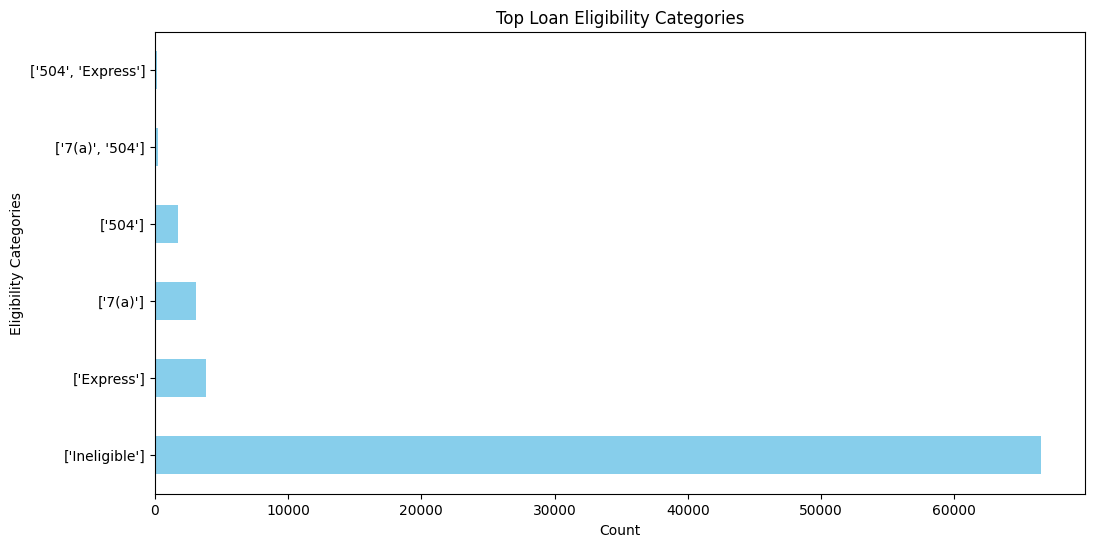

In [ ]:
plt.figure(figsize=(12, 6))
updated_df["Eligibility"].value_counts().nlargest(10).plot(kind='barh', color='skyblue')
plt.title("Top Loan Eligibility Categories")
plt.xlabel("Count")
plt.ylabel("Eligibility Categories")
plt.show()

**Goal for this code block**

The code block below balances the eligibility class distribution to ensure that machine learning doesn't become biased toward overrepresented classes. It uses **SMOTE** for numerical features and Random Oversampling for categorical features which effectively creates a hybrid sampling strategy tailored to mixed-type data.

Why Use Both `SMOTE` and `RandomOverSampler`?
* SMOTE: Great for generating realistic, diverse numerical feature values.
* Random Oversampling: Good way to match sample size for categorical data, which SMOTE can not handle directly.



In [ ]:
# Identify categorical and numerical columns
categorical_columns = updated_df.select_dtypes(exclude=['number']).columns.tolist()
numerical_columns = updated_df.select_dtypes(include=['number']).columns.tolist()

# Ensure 'Eligibility' is excluded from the feature columns
if 'Eligibility' in categorical_columns:
    categorical_columns.remove('Eligibility')
if 'Eligibility' in numerical_columns:
    numerical_columns.remove('Eligibility')

# **Step 1: Limit each class to a maximum of 12,000 samples BEFORE applying oversampling**
# We limit the number of samples to prevent any class from dominating the dataset before oversampling
updated_df = updated_df.groupby('Eligibility', group_keys=False).apply(lambda x: x.sample(n=min(15000, len(x)), random_state=42)).reset_index(drop=True)

# Separate the dataset into numerical and categorical features
X_numerical = updated_df[numerical_columns]
X_categorical = updated_df[categorical_columns]

# Target variable
y = updated_df['Eligibility']

# **Step 2: Apply SMOTE to numerical features to generate synthetic data**
# SMOTE will generate synthetic examples for the minority classes in the numerical features
smote = SMOTE(random_state=42)
X_numerical_resampled, y_resampled = smote.fit_resample(X_numerical, y)

# **Step 3: Apply Random Oversampling to categorical features**
# To balance the dataset, we use Random Oversampling to increase the minority class samples in categorical features
ros = RandomOverSampler(random_state=42)
X_categorical_resampled, y_categorical_resampled = ros.fit_resample(X_categorical, y)

# Ensure categorical resampled data matches the size of the SMOTE-resampled data
X_categorical_resampled = X_categorical_resampled.iloc[:len(X_numerical_resampled)].reset_index(drop=True)
y_categorical_resampled = y_categorical_resampled.iloc[:len(X_numerical_resampled)].reset_index(drop=True)

# **Step 4: Merge the resampled categorical and numerical data back together**
# We combine the resampled data for both numerical and categorical features
balanced_df = pd.concat([X_categorical_resampled, pd.DataFrame(X_numerical_resampled, columns=numerical_columns)], axis=1)
balanced_df['Eligibility'] = y_categorical_resampled  # Ensure the target variable is retained

# **Step 5: Limit each class to 12,000 samples again (if oversampled too much)**
# After oversampling, we limit the sample size again to avoid overly inflated class sizes
balanced_df = balanced_df.groupby('Eligibility', group_keys=False).apply(lambda x: x.sample(n=min(15000, len(x)), random_state=42)).reset_index(drop=True)

# Display the final class distribution to confirm balance
print("Final Balanced Class Distribution (Capped at 12,000 per class):\n", balanced_df['Eligibility'].value_counts())


<ipython-input-16-900af55f2ab1>:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  updated_df = updated_df.groupby('Eligibility', group_keys=False).apply(lambda x: x.sample(n=min(15000, len(x)), random_state=42)).reset_index(drop=True)


Final Balanced Class Distribution (Capped at 12,000 per class):
 Eligibility
['504', 'Express']    15000
['504']               15000
['7(a)', '504']       15000
['7(a)']              15000
['Express']           15000
['Ineligible']        15000
Name: count, dtype: int64


<ipython-input-16-900af55f2ab1>:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = balanced_df.groupby('Eligibility', group_keys=False).apply(lambda x: x.sample(n=min(15000, len(x)), random_state=42)).reset_index(drop=True)


Exploratory Data Analysis(EDA)

To explore feature relationships, inspect data distributions, and verify class balance post-sampling. This step helps ensure the synthetic data generated aligns with realistic expectations and is well-prepared for machine learning.

This EDA step validates the quality and balance of synthetic data through:

* Correlation checks

* Numeric and categorical feature distribution

* Final confirmation of class balance

In [ ]:
balanced_df

Business Structure Country                Location  \
0                         LLC      US         Jessicaview, KY   
1                 Partnership      US      Moralesborough, MT   
2                 Partnership      US      Moralesborough, MT   
3                         LLC      US           Ariasfurt, TX   
4                         LLC      US  New Rebeccaborough, MS   
...                       ...     ...                     ...   
89995     Sole Proprietorship      US         Lake Ronald, VT   
89996                     PLC      US         North Brian, IL   
89997                     LLC      US        North Rodney, NH   
89998  C Corporation (C-Corp)      US         Alexishaven, CO   
89999                and Sons      US     Lake Joshualand, OR   

       Collateral Availability  Fast Approval  For Profit  \
0                         True           True        True   
1                         True           True        True   
2                         True           True        True   
3                         True           True        True   
4                         True           True        True   
...                        ...            ...         ...   
89995                    False          False       False   
89996                    False           True        True   
89997                    False          False        True   
89998                     True          False        True   
89999                     True           True        True   

       Acquisition Request  Working Capital  Business Expansion  \
0                     True            False               False   
1                     True            False               False   
2                     True            False               False   
3                    False            False               False   
4                     True            False                True   
...                    ...              ...                 ...   
89995                False             True               False   
89996                 True             True                True   
89997                False            False               False   
89998                False            False                True   
89999                 True            False               False   

       Equipment Purchase or Leasing  ...  NOI (1 year ago)  \
0                               True  ...            213972   
1                               True  ...            360681   
2                               True  ...            211104   
3                               True  ...            601397   
4                               True  ...            137572   
...                              ...  ...               ...   
89995                          False  ...            364955   
89996                          False  ...            206193   
89997                          False  ...            235491   
89998                          False  ...            588842   
89999                           True  ...            231185   

       NOI (latest year)  DSCR (2 years ago)  DSCR (1 year ago)  \
0                 368464            2.029063           1.528647   
1                 180163            1.745945           0.828177   
2                 348467            0.674695           0.700674   
3                 298746            1.481383           1.189659   
4                 353827            1.686614           1.025613   
...                  ...                 ...                ...   
89995             235003            0.240000           0.540000   
89996             737940            1.450000           0.860000   
89997             413497            2.450000           1.980000   
89998             321824            1.470000           1.480000   
89999             283759            0.630000           0.940000   

       DSCR (latest year)  Industry Experience  Managerial Experience  \
0                2.038335                   18           

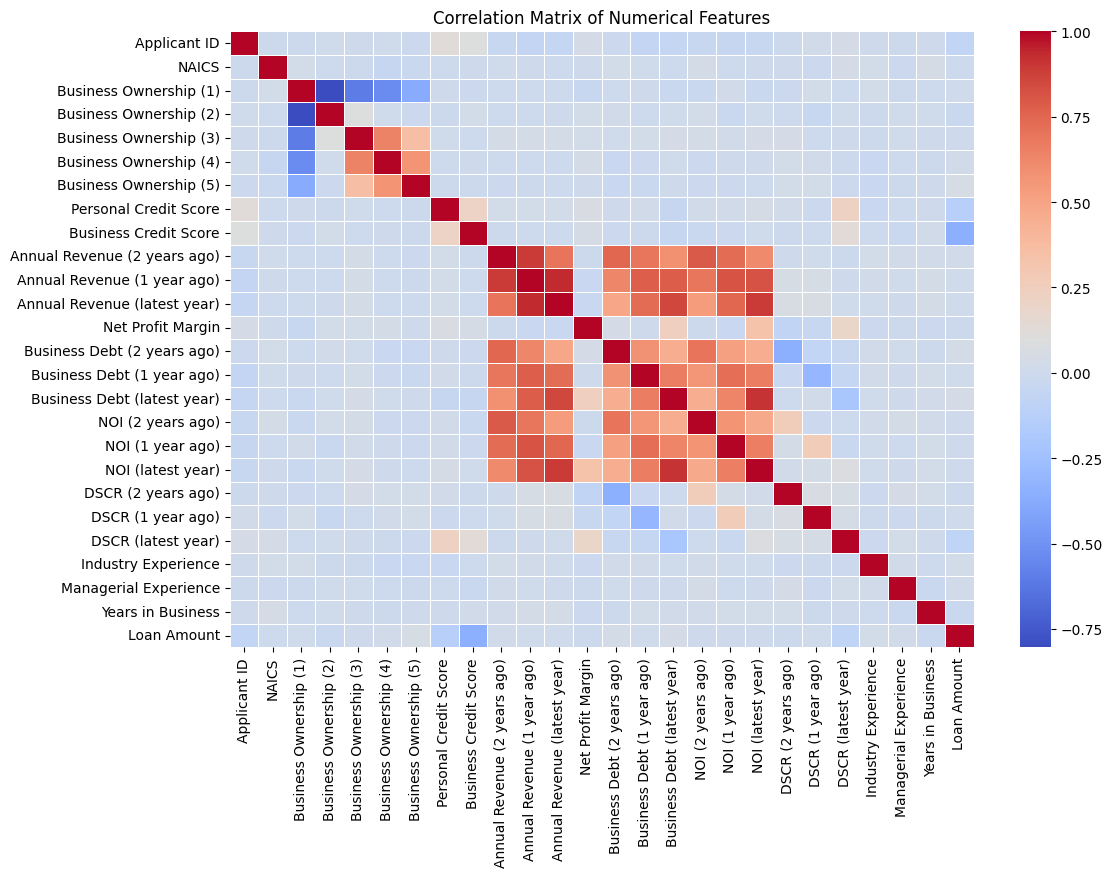

In [ ]:
# Correlation Matrix
numerical_cols = balanced_df.select_dtypes(include=[np.number]).columns
corr_matrix = balanced_df[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

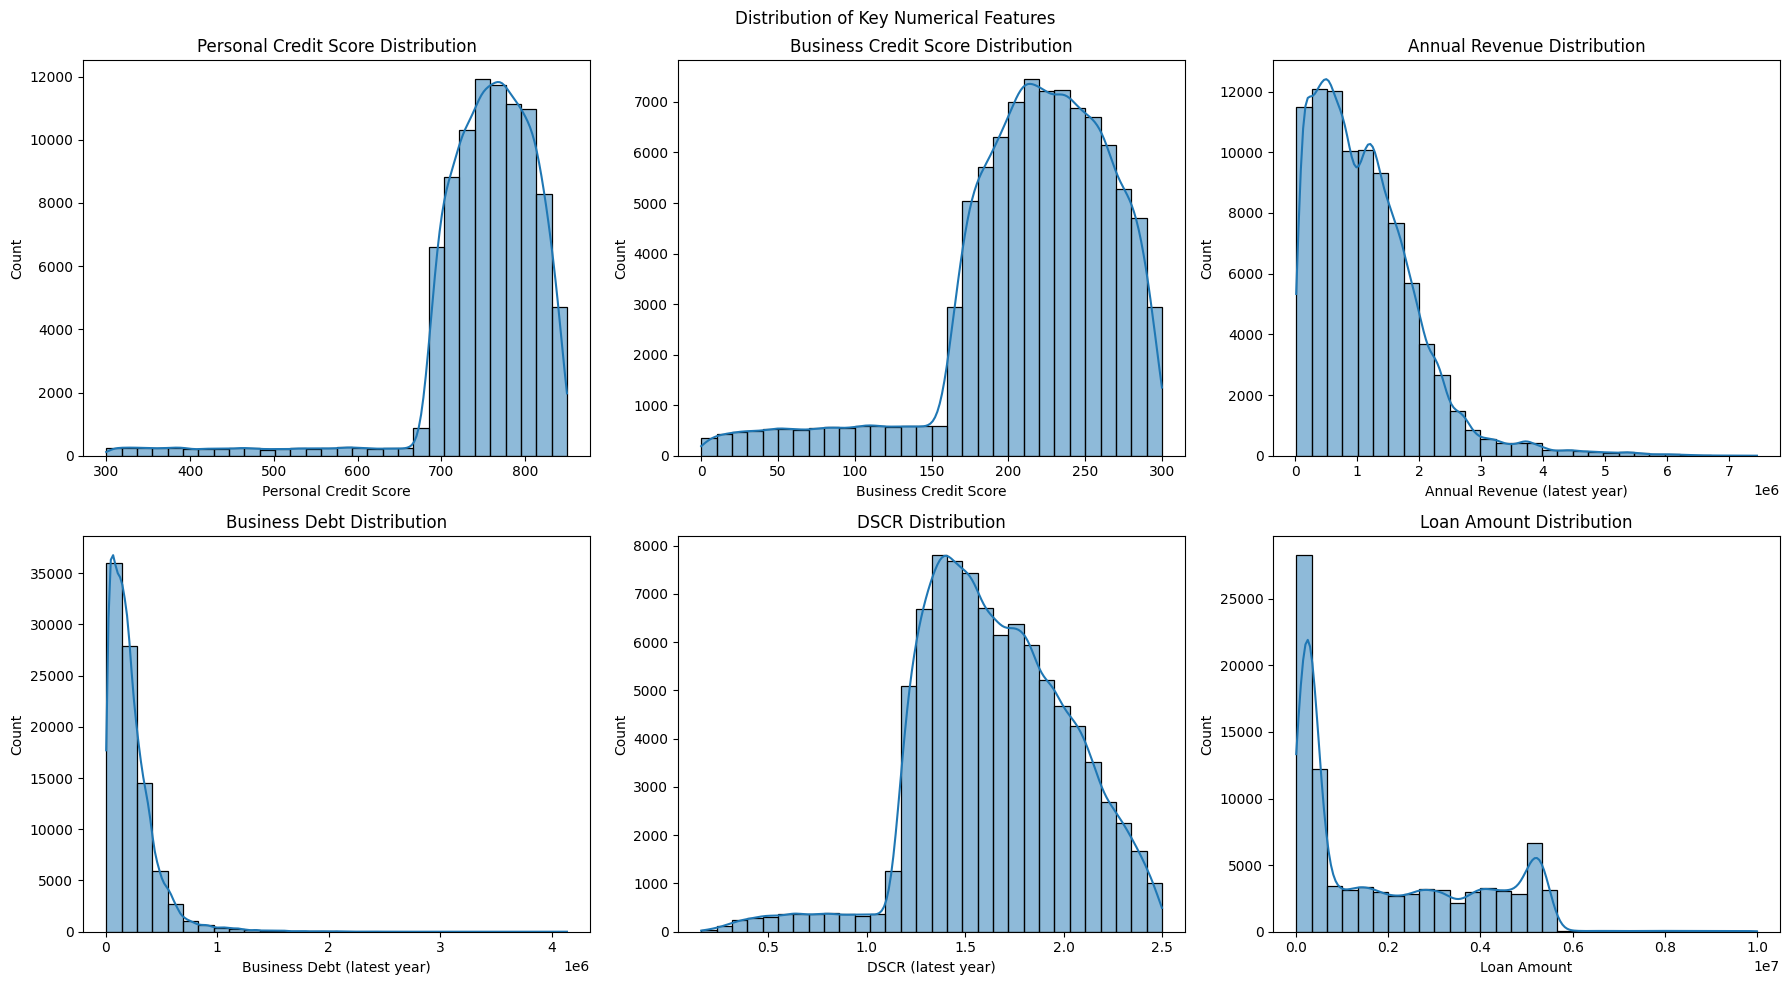

In [ ]:
# Visualizing key numerical distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Distribution of Key Numerical Features")

sns.histplot(balanced_df["Personal Credit Score"], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Personal Credit Score Distribution")

sns.histplot(balanced_df["Business Credit Score"], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Business Credit Score Distribution")

sns.histplot(balanced_df["Annual Revenue (latest year)"], bins=30, kde=True, ax=axes[0, 2])
axes[0, 2].set_title("Annual Revenue Distribution")

sns.histplot(balanced_df["Business Debt (latest year)"], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Business Debt Distribution")

sns.histplot(balanced_df["DSCR (latest year)"], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("DSCR Distribution")

sns.histplot(balanced_df["Loan Amount"], bins=30, kde=True, ax=axes[1, 2])
axes[1, 2].set_title("Loan Amount Distribution")

plt.tight_layout()
plt.show()

<ipython-input-20-f7b72428defc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=balanced_df["Business Structure"], order=balanced_df["Business Structure"].value_counts().index, palette="Set2")


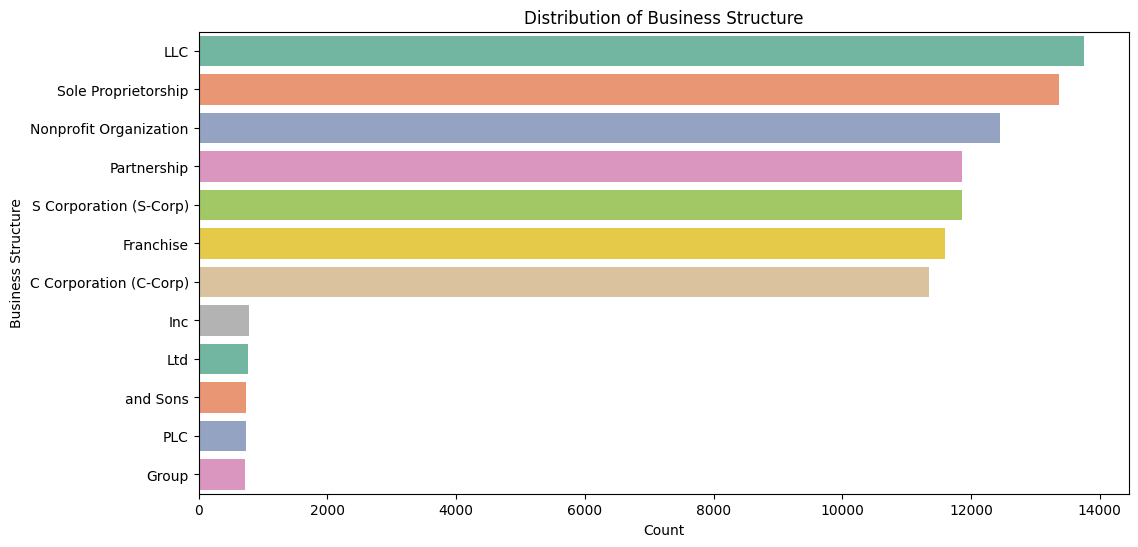

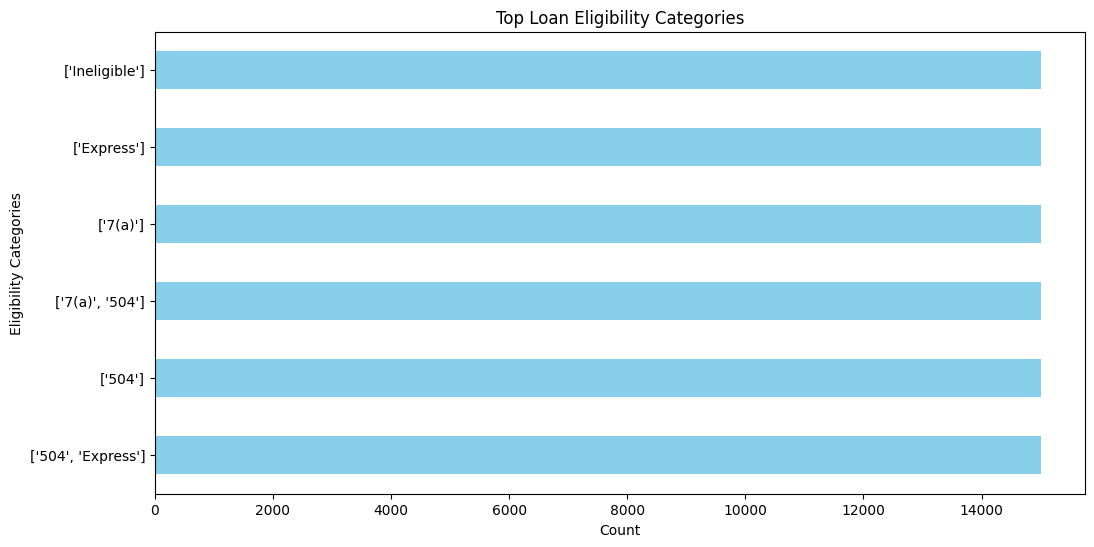

In [ ]:
# Categorical Feature Distribution
plt.figure(figsize=(12, 6))
sns.countplot(y=balanced_df["Business Structure"], order=balanced_df["Business Structure"].value_counts().index, palette="Set2")
plt.title("Distribution of Business Structure")
plt.xlabel("Count")
plt.ylabel("Business Structure")
plt.show()

plt.figure(figsize=(12, 6))
balanced_df["Eligibility"].value_counts().nlargest(10).plot(kind='barh', color='skyblue')
plt.title("Top Loan Eligibility Categories")
plt.xlabel("Count")
plt.ylabel("Eligibility Categories")
plt.show()

**Neural Network Pipeline for Loan Eligibility Prediction**

In `df_sampled` a balanced subset of 70,000 records for training and evaluation while maintaining class distribution using stratified sampling. Helps reduce compuatational cost while retaining represnetative diversity


In [ ]:
df_sampled, _ = train_test_split(balanced_df, train_size=70000, stratify=balanced_df['Eligibility'], random_state=42)

**Deep Learning Model for Loan Eligibility Classification**

This code block builds and evaluates a deep learning model to classify the loan applicants into one or more eligibility categories (e.g., “7(a)”, “504”, “Express”, or “Ineligible”). The model is trained on synthetically generated and balanced data with engineered features that emphasize financial risk and loan-specific criteria.

**Data Preprocessing**

* The `Eligibility` column is cleaned by removing `[]` and encoded into numeric labels for compatibility with machine learning models.

* All remaining categorical features are label encoded.

* Unnecessary metadata columns (like IDs or country info) are removed.

**Feature Engineering**
Some features are engineered to help the model learn the relationships between them.

* Risk Flags like `High_DSCR`, `Low_DSCR`, `Risk_Score`, etc., quantify financial health.

* Growth & Ratio Metrics like `Revenue_Growth`, `Debt_Coverage_Ratio`, and `Liquidity_Ratio` capture business performance.

* Custom Heuristics like `Express_Loan_Score` help fine-tune the models ability to distinguish eligibility types.

* Polynomial Features and log transforms are introduced to handle non-linear relationships and skewed distributions.

**Feature Scaling**

Standardization is applied across features using `StandardScalar`, ensuring each input has zero mean and unit variance which is important for the performance of neural network training.

**Train, Test, and, Validation Splits**

The dataset is split into 70% Training, 10% Testing, and 20% Validation Stratification to ensure all sets maintain the same class balance.

**Class Weights Adjustments**

The resolve imbalanced class frequency weights are computed inversely proportional to class frequency.

The `Ineligible` class is intentionally given extra weight to penalize false negatives, which are critical in loan rejection cases.

**Neural Network Model Design**

* A feedforward deep neural network is defined with:

* 3 hidden layers of decreasing size (256 → 128 → 64)

* BatchNormalization after each layer for stability

* LeakyReLU activations to handle dead neurons

* Dropout for regularization

* L1/L2 penalties on weights to combat overfitting

* Final softmax output layer for multi-class classification


** Training Configuration **

* `EarlyStopping`: Stops when validation loss if it doesn't improve for 5 epochs.

* `ReduceLROnPlateau`: Reduces learning rate if the model is stable when it comes to accuracy

* A `batch_size` of 256 to balance memory use and gradient stability.

**Evaluation**

Predictions are made on training, validation, and test sets.

Results are reported via `classification_report`, showing:

* Precision: Accuracy of positive predictions

* Recall: Shows true positives

* F1-score: Balaced mean of precision and recall

* Support: Number of true instances per class

**Observation and Performance**

Gradual learning through 40 epochs:

* Accuracy improves from 16% → 63.5%

* Validation accuracy reaches ~85%, showing strong generalization.

**Class performance**

* All classes, including "Ineligible", show F1-scores > 0.83.

* `504, Express` and `7(a)`, `504` exhibit high recall, indicating the model correctly identifies dual-eligibility scenarios.




**Resources**

* Feedforward Neural Networks: https://www.analyticsvidhya.com/blog/2022/03/basic-introduction-to-feed-forward-network-in-deep-learning/

* BatchNormalization: https://towardsdatascience.com/batch-norm-explained-visually-how-it-works-and-why-neural-networks-need-it-b18919692739/

* LeakyReLU: https://medium.com/@juanc.olamendy/understanding-relu-leakyrelu-and-prelu-a-comprehensive-guide-20f2775d3d64

* L1/L2: https://neptune.ai/blog/fighting-overfitting-with-l1-or-l2-regularization

* SoftMax: https://machinelearningmastery.com/softmax-activation-function-with-python/

* Dropout Regularization: https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/


In [ ]:
df_sampled.columns

Index(['Business Structure', 'Country', 'Location', 'Collateral Availability',
       'Fast Approval', 'For Profit', 'Acquisition Request', 'Working Capital',
       'Business Expansion', 'Equipment Purchase or Leasing',
       'Inventory Purchase', 'Real Estate Acquisition or Improvement',
       'Business Acquisition or Buyout', 'Refinancing Existing Debt',
       'Emergency Funds', 'Franchise Financing', 'Contract Financing',
       'Licensing or Permits', 'Line of Credit Establishment', 'Applicant ID',
       'NAICS', 'Business Ownership (1)', 'Business Ownership (2)',
       'Business Ownership (3)', 'Business Ownership (4)',
       'Business Ownership (5)', 'Personal Credit Score',
       'Business Credit Score', 'Annual Revenue (2 years ago)',
       'Annual Revenue (1 year ago)', 'Annual Revenue (latest year)',
       'Net Profit Margin', 'Business Debt (2 years ago)',
       'Business Debt (1 year ago)', 'Business Debt (latest year)',
       'NOI (2 years ago)', 'NOI (1 year a

In [ ]:
import warnings
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1_l2
from sklearn.utils.class_weight import compute_class_weight

warnings.filterwarnings("ignore")

# -----------------------------
# 1. Data Preprocessing
# -----------------------------
# Clean and prepare 'Eligibility' for processing
df_sampled['Eligibility'] = df_sampled['Eligibility'].astype(str)
df_sampled['Eligibility'] = df_sampled['Eligibility'].str.replace(r"[\[\]']", '', regex=True)
df_sampled['Eligibility'] = df_sampled['Eligibility'].str.strip()

# Encode the target 'Eligibility' to numerical values for model compatibility
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_sampled['Eligibility'])
target_labels = label_encoder.classes_

# Drop unnecessary columns like 'Eligibility', 'Applicant ID', etc., from feature set
df_sampled.drop(columns=['Eligibility', 'Applicant ID', 'Country', 'Location'], inplace=True, errors='ignore')

# Label encode categorical features for processing in the neural network
categorical_cols = df_sampled.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_sampled[col] = le.fit_transform(df_sampled[col].astype(str))
    label_encoders[col] = le

X = df_sampled.copy()

# -----------------------------
# 2. Feature Engineering
# -----------------------------
# Add new features that might help the model learn better

# Debt-Service Coverage Ratio flags (High or Low)
X["High_DSCR"] = (X["DSCR (latest year)"] > 1.5).astype(int)
X["Low_DSCR"] = (X["DSCR (latest year)"] < 1.0).astype(int)

# Debt-to-Income ratio for risk assessment
X["Debt_to_Income_Ratio"] = X["Business Debt (latest year)"] / (X["Annual Revenue (latest year)"] + 1)

# Flag for Real Estate heavy businesses
X["Real_Estate_Heavy"] = X["Real Estate Acquisition or Improvement"].astype(int)

# Calculate revenue growth and other useful financial ratios
X["Revenue_Growth"] = (X["Annual Revenue (latest year)"] - X["Annual Revenue (1 year ago)"]) / (X["Annual Revenue (1 year ago)"] + 1)
X["Debt_Coverage_Ratio"] = X["NOI (latest year)"] / (X["Business Debt (latest year)"] + 1)

# Adding non-linear transformations to capture more complexity
X["Debt_Coverage_Squared"] = X["Debt_Coverage_Ratio"] ** 2

# Liquidity ratio for assessing short-term solvency
X["Liquidity_Ratio"] = X["Annual Revenue (latest year)"] / (X["Business Debt (latest year)"] + 1)

# Create a risk score based on multiple indicators
X["Risk_Score"] = (
    (X["DSCR (latest year)"] < 1.0).astype(int) * 0.5 +  # Stronger weight for low DSCR
    (X["Debt_to_Income_Ratio"] > 0.6).astype(int) * 0.3 +
    (X["Liquidity_Ratio"] < 0.5).astype(int) * 0.3 +
    (X["Annual Revenue (latest year)"] < 100000).astype(int) * 0.4 +  # Lower revenue is riskier
    (X["Business Credit Score"] < 140).astype(int) * 0.3  # Poor credit score increases risk
)

# Adjust the Express Loan score to reduce false positives
X["Express_Loan_Score"] = (
    (X["Fast Approval"].astype(int) * 0.2) +
    (X["Loan Amount"] <= 500000).astype(int) * 0.2 +
    (X["Working Capital"].astype(int) * 0.2) +
    (X["Business Credit Score"] > 160).astype(int) * 0.2 +
    (X["DSCR (latest year)"] > 1.2).astype(int) * 0.2
)

# Polynomial features for capturing non-linear relationships
X["DSCR_Squared"] = X["DSCR (latest year)"] ** 2
X["Debt_to_Income_Squared"] = X["Debt_to_Income_Ratio"] ** 2

# Log transform skewed features to make them more normal
skewed_features = ["Annual Revenue (latest year)", "Business Debt (latest year)"]
for feature in skewed_features:
    X[feature] = np.log1p(X[feature])

# Convert 'Years in Business' to categorical values for easier model interpretation
X["Business_Age_Category"] = pd.cut(
    X["Years in Business"].fillna(0),
    bins=[0, 2, 5, 10, 20, 100],
    labels=[1, 2, 3, 4, 5]
).astype(float).fillna(1).astype(int)

# Standardize all features so they are on the same scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 3. Train-Test Split
# -----------------------------
# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.33, stratify=y_temp, random_state=42)

# -----------------------------
# 4. Adjusted Class Weights
# -----------------------------
# Compute class weights to address the imbalance in our target classes
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Give more weight to 'Ineligible' cases since they might be underrepresented
ineligible_idx = np.where(target_labels == "Ineligible")[0][0]
class_weight_dict[ineligible_idx] *= 1.5  # Boost the weight of the 'Ineligible' class

# -----------------------------
# 5. Build the Neural Network Model
# -----------------------------
# Use a slightly lower learning rate for better stability during training
optimizer = AdamW(learning_rate=7e-6, weight_decay=1e-5)

# Build a sequential model with batch normalization, dropout, and regularization
model = Sequential([
    BatchNormalization(input_shape=(X_train.shape[1],)),  # Normalize the input data

    Dense(256, kernel_regularizer=l1_l2(l1=0.0006, l2=0.001)),  # Apply regularization to the dense layer
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.6),  # Dropout for preventing overfitting

    Dense(128, kernel_regularizer=l1_l2(l1=0.0006, l2=0.001)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),

    Dense(64, kernel_regularizer=l1_l2(l1=0.0006, l2=0.001)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),

    Dense(len(target_labels), activation='softmax')  # Output layer for classification
])

# Compile the model using sparse categorical crossentropy loss function
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

model.summary()

# -----------------------------
# 6. Train the Model with Early Stopping
# -----------------------------
# Use early stopping to halt training if the model's performance stops improving
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Reduce the learning rate if validation loss plateaus to prevent overfitting
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, min_lr=5e-7, verbose=1)

# Train the model with the specified parameters
history = model.fit(X_train, y_train,
                    epochs=40,  # Train for more epochs for fine-tuning
                    batch_size=256,  # Reasonable batch size for stability
                    validation_data=(X_valid, y_valid),
                    class_weight=class_weight_dict,  # Adjust class weights
                    callbacks=[early_stop, reduce_lr],
                    verbose=2)

# -----------------------------
# 7. Evaluate the Model
# -----------------------------
# Get predictions for the training, validation, and test sets
y_pred_train = np.argmax(model.predict(X_train), axis=1)
y_pred_valid = np.argmax(model.predict(X_valid), axis=1)
y_pred_test  = np.argmax(model.predict(X_test), axis=1)

# Display the performance on each dataset
print("\n Performance on Training Set:")
print(classification_report(y_train, y_pred_train, target_names=target_labels, zero_division=1))

print("\n Performance on Validation Set:")
print(classification_report(y_valid, y_pred_valid, target_names=target_labels, zero_division=1))

print("\n Performance on Test Set:")
print(classification_report(y_test, y_pred_test, target_names=target_labels, zero_division=1))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 55)             │           220 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        14,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,890 (226.13 KB)

 Trainable params: 56,884 (222.20 KB)

 Non-trainable params: 1,006 (3.93 KB)

Epoch 1/40
192/192 - 8s - 41ms/step - accuracy: 0.1689 - loss: 5.2698 - val_accuracy: 0.1949 - val_loss: 4.4013 - learning_rate: 7.0000e-06
Epoch 2/40
192/192 - 4s - 21ms/step - accuracy: 0.1780 - loss: 5.1797 - val_accuracy: 0.2439 - val_loss: 4.3508 - learning_rate: 7.0000e-06
Epoch 3/40
192/192 - 3s - 13ms/step - accuracy: 0.1844 - loss: 5.1217 - val_accuracy: 0.2980 - val_loss: 4.2987 - learning_rate: 7.0000e-06
Epoch 4/40
192/192 - 3s - 17ms/step - accuracy: 0.1969 - loss: 5.0317 - val_accuracy: 0.3472 - val_loss: 4.2486 - learning_rate: 7.0000e-06
Epoch 5/40
192/192 - 2s - 12ms/step - accuracy: 0.2074 - loss: 4.9630 - val_accuracy: 0.3921 - val_loss: 4.2010 - learning_rate: 7.0000e-06
Epoch 6/40
192/192 - 2s - 11ms/step - accuracy: 0.2188 - loss: 4.8950 - val_accuracy: 0.4375 - val_loss: 4.1550 - learning_rate: 7.0000e-06
Epoch 7/40
192/192 - 2s - 10ms/step - accuracy: 0.2202 - loss: 4.8604 - val_accuracy: 0.4737 - val_loss: 4.1125 - learning_rate: 7.0000e-06
Epoch 8/40
192/192 -

In [ ]:
y_probs_nn = model.predict(X_test)[:, 1]

217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


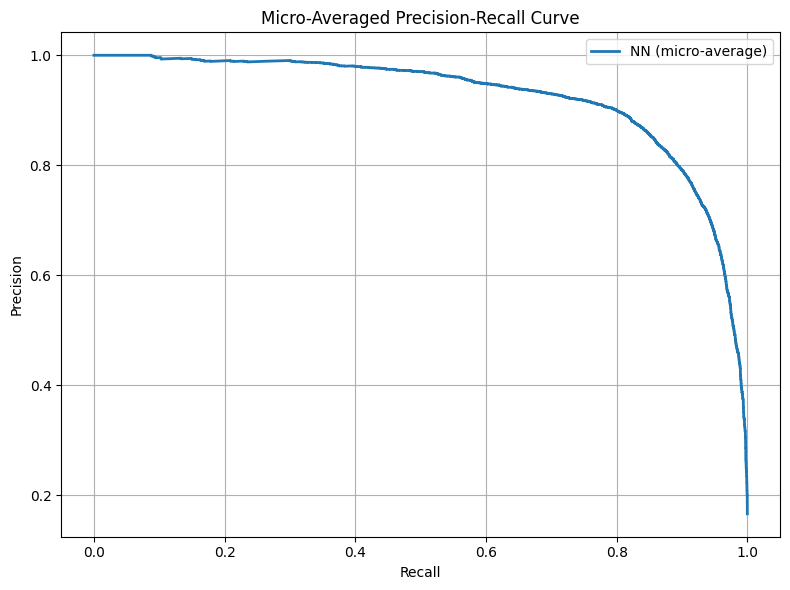

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve

y_test_bin = label_binarize(y_test, classes=np.arange(len(target_labels)))
y_probs_nn = model.predict(X_test)

precision, recall, _ = precision_recall_curve(y_test_bin.ravel(), y_probs_nn.ravel())

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='NN (micro-average)', linewidth=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Micro-Averaged Precision-Recall Curve')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


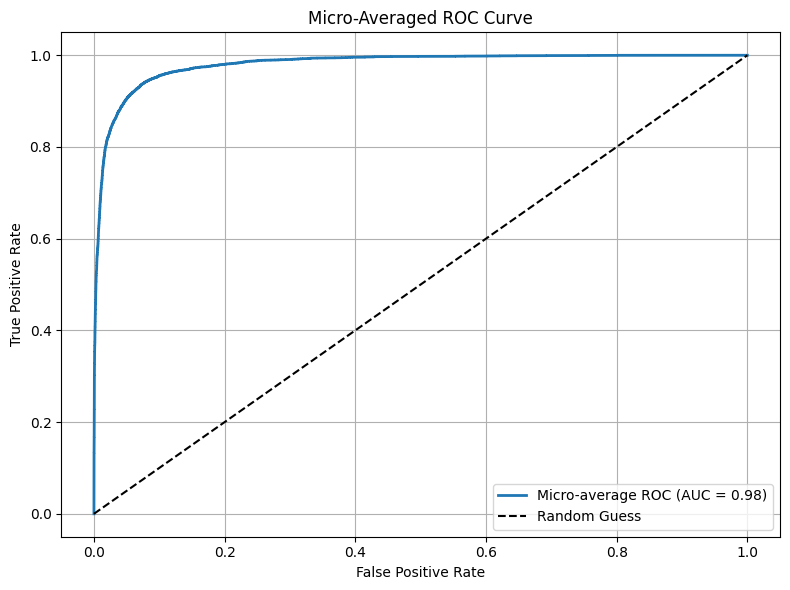

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_probs_nn.ravel())
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Micro-average ROC (AUC = {roc_auc:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-Averaged ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**XGBoost for Loan Eligibility Prediction**

**Stratified Sampling**

A sample of 80,000 records drawn from the current data to ensures the model is trained on a sufficiently large and representative subset while reducing computational overhead.

**Data Preprocessing**
* The Eligibility column is cleaned by removing `[]` and encoded into numeric labels for compatibility with machine learning models.

* All remaining categorical features are label encoded using `LabelEncoder`.

* Resource: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

* Unnecessary metadata columns (like IDs or country info) are removed.

**Feature Engineering**

Some domain-specifc features are added to boost model performance:

`High_DSCR`, `Low_DSCR`: Capture financial risk thresholds.

`Debt_to_Income_Ratio`: Measures debt relative to income.

`Revenue_Growth`: Captures business momentum in given period.

`Risk_Score`: Weighted combination of poor DSCR, high debt, low revenue, and weak business credit score.

These are some of the features help the model capture risk signals in leanding decisions

**Power Transformations**

Resource: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html

`Why?`: Many financial features are skewed

`How?`: `PowerTransformer` is used to reduce skewness and approximate normal distribution.

If a mismatch happens between transformed and orignal features, a placeholder feature names are assigned

**Train Test Split**

The dataset is split into 70% Training, 10% Testing, and 20% Validation Stratification to ensure all sets maintain the same class balance.

**Class Weighting**

* Class weights are computed to prevent any residual imbnalance.

* Special Adjustments are made for `Ineligible` class which is boosted more heavily due to its sensitvity in lending and `7(a)` is slightly upweighted to enhance recognition of core loan types.

These weights are included via `scale_pos_weight` in XGBoost.

**Model Training**

Evaludation Metric used in Multi-class log loss (mlogloss)

Resource: https://xgboost.readthedocs.io/en/stable/parameter.html


**Control**

* `early_stopping_rounds=30` halts training if validation loss stalls

* `learning_rate=0.008` ensures slow, stable learning

**Regularization and Anti-Overfitting Strategies**

1. `max_depth=2` helps shallow tress prevent overfitting the model
2. `min_child_weight=12` avoids splitting on small and nosiy data
3. `gamma=6.0` requries high gain for a node split
4. `subsamples=0.4` uses only 40% of training data per tree
5. `colsample_bytree=0.5` uses half of the features per tree
6. `reg_alpha`, `reg_lambda` L1 and L2 regularization

**Observations and Evaulation**

* The predictions are converted to class labels using `argmax`

* The model excels in predicting multi-eligible applicants and core SBA loans

* For dual-eligibility classes recall is high and good f1-scores

* There is slight recall drops on `Ineligible` class given its complexity and importance weighting


In [ ]:
df_sampled, _ = train_test_split(balanced_df, train_size=80000, stratify=balanced_df['Eligibility'], random_state=42)

In [ ]:
import warnings
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils.class_weight import compute_class_weight

warnings.filterwarnings("ignore")

# -----------------------------
# 1. Data Preprocessing
# -----------------------------
# Clean and format 'Eligibility' column for processing
df_sampled['Eligibility'] = df_sampled['Eligibility'].astype(str)
df_sampled['Eligibility'] = df_sampled['Eligibility'].str.replace(r"[\[\]']", '', regex=True).str.strip()

# Encode 'Eligibility' into numeric values for model compatibility
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_sampled['Eligibility'])
target_labels = label_encoder.classes_

# Drop columns we don't need for model training
df_sampled.drop(columns=['Eligibility', 'Applicant ID', 'Country', 'Location'], inplace=True, errors='ignore')

# Encode categorical features (convert them to numeric labels)
categorical_cols = df_sampled.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_sampled[col] = le.fit_transform(df_sampled[col].astype(str))
    label_encoders[col] = le

X = df_sampled.copy()

# -----------------------------
# 2. Feature Engineering
# -----------------------------
# Create features related to risk indicators (e.g., DSCR, debt-to-income ratio)
X["High_DSCR"] = (X["DSCR (latest year)"] > 1.5).astype(int)
X["Low_DSCR"] = (X["DSCR (latest year)"] < 1.0).astype(int)
X["Debt_to_Income_Ratio"] = X["Business Debt (latest year)"] / (X["Annual Revenue (latest year)"] + 1)
X["Revenue_Growth"] = (X["Annual Revenue (latest year)"] - X["Annual Revenue (1 year ago)"]) / (X["Annual Revenue (1 year ago)"] + 1)

# Risk score based on various financial metrics
X["Risk_Score"] = (
    (X["DSCR (latest year)"] < 1.0).astype(int) * 0.7 +
    (X["Debt_to_Income_Ratio"] > 0.6).astype(int) * 0.4 +
    (X["Annual Revenue (latest year)"] < 100000).astype(int) * 0.5 +
    (X["Business Credit Score"] < 140).astype(int) * 0.5
)

# Apply power transformation to make skewed features more normally distributed
power_transformer = PowerTransformer()
X_transformed = power_transformer.fit_transform(X)

# If the number of features changes after transformation, assign new names
original_feature_names = df_sampled.columns.tolist()
if X_transformed.shape[1] != len(original_feature_names):
    print(f" Feature name length mismatch: Expected {len(original_feature_names)}, got {X_transformed.shape[1]}")
    feature_names = [f"Feature_{i}" for i in range(X_transformed.shape[1])]  # Generate new names
else:
    feature_names = original_feature_names  # Keep original names

# -----------------------------
# 3. Train-Test Split
# -----------------------------
# Split data into training, validation, and test sets (stratify to preserve class distribution)
X_train, X_temp, y_train, y_temp = train_test_split(X_transformed, y, test_size=0.3, stratify=y, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.33, stratify=y_temp, random_state=42)

# -----------------------------
# 4. Compute Class Weights (Boost "Ineligible" Class)
# -----------------------------
# Calculate class weights to handle imbalanced classes
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Increase the weight of the 'Ineligible' class to reduce underfitting
ineligible_idx = np.where(target_labels == "Ineligible")[0][0]
class_weight_dict[ineligible_idx] *= 1.6  # Slight increase to focus more on 'Ineligible'

# Slightly adjust the weight for '7(a)' to maintain balance
seven_a_idx = np.where(target_labels == "7(a)")[0][0]
class_weight_dict[seven_a_idx] *= 1.05  # Small adjustment to balance

# -----------------------------
# 5. XGBoost Model Training (Regularized to Reduce Overfitting)
# -----------------------------
# Prepare the training and validation datasets
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

# XGBoost parameters with regularization to avoid overfitting
xgb_params = {
    "objective": "multi:softprob",
    "num_class": len(target_labels),
    "eval_metric": "mlogloss",
    "tree_method": "hist",
    "booster": "gbtree",
    "learning_rate": 0.008,  # Controlled learning rate to avoid too fast convergence
    "n_estimators": 150,  # Limiting the number of trees to avoid overfitting
    "max_depth": 2,  # Shallow trees for better generalization
    "min_child_weight": 12,  # Prevent overfitting small splits
    "gamma": 6.0,  # Strong pruning for better model performance
    "subsample": 0.4,  # Reduce overfitting by using fewer samples per tree
    "colsample_bytree": 0.5,  # Limit the number of features per tree
    "reg_alpha": 0.1,  # L1 regularization
    "reg_lambda": 0.6,  # L2 regularization to control overfitting
    "scale_pos_weight": class_weight_dict  # Class balancing based on weights
}

# Train the model with early stopping if validation loss doesn't improve
xgb_model = xgb.train(
    xgb_params,
    dtrain,
    num_boost_round=150,
    evals=[(dvalid, "valid")],
    early_stopping_rounds=30,  # Stop if no improvement in validation loss
    verbose_eval=50
)

# -----------------------------
# 6. Make Predictions and Evaluate the Model
# -----------------------------
# Prepare test dataset and make predictions
dtest = xgb.DMatrix(X_test)
y_pred_train = np.argmax(xgb_model.predict(dtrain), axis=1)
y_pred_valid = np.argmax(xgb_model.predict(dvalid), axis=1)
y_pred_test  = np.argmax(xgb_model.predict(dtest), axis=1)

# Compute accuracy for each dataset
train_accuracy = accuracy_score(y_train, y_pred_train)
valid_accuracy = accuracy_score(y_valid, y_pred_valid)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Display the evaluation metrics
print(f"\n Training Accuracy: {train_accuracy:.3f}")
print(f" Validation Accuracy: {valid_accuracy:.3f}")
print(f" Test Accuracy: {test_accuracy:.3f}")

# Print detailed classification reports
print("\n Performance on Training Set:")
print(classification_report(y_train, y_pred_train, target_names=target_labels, zero_division=1))

print("\n Performance on Validation Set:")
print(classification_report(y_valid, y_pred_valid, target_names=target_labels, zero_division=1))

print("\n Performance on Test Set:")
print(classification_report(y_test, y_pred_test, target_names=target_labels, zero_division=1))


 Feature name length mismatch: Expected 42, got 47
[0]	valid-mlogloss:1.78567
[50]	valid-mlogloss:1.46287
[100]	valid-mlogloss:1.23374
[149]	valid-mlogloss:1.06043

 Training Accuracy: 0.872
 Validation Accuracy: 0.867
 Test Accuracy: 0.874

 Performance on Training Set:
              precision    recall  f1-score   support

         504       0.91      0.80      0.85      9334
504, Express       0.80      1.00      0.89      9334
        7(a)       0.90      0.93      0.91      9333
   7(a), 504       0.84      1.00      0.91      9333
     Express       0.87      0.85      0.86      9333
  Ineligible       1.00      0.65      0.79      9333

    accuracy                           0.87     56000
   macro avg       0.88      0.87      0.87     56000
weighted avg       0.88      0.87      0.87     56000


 Performance on Validation Set:
              precision    recall  f1-score   support

         504       0.91      0.80      0.85      2680
504, Express       0.79      1.00      0.88

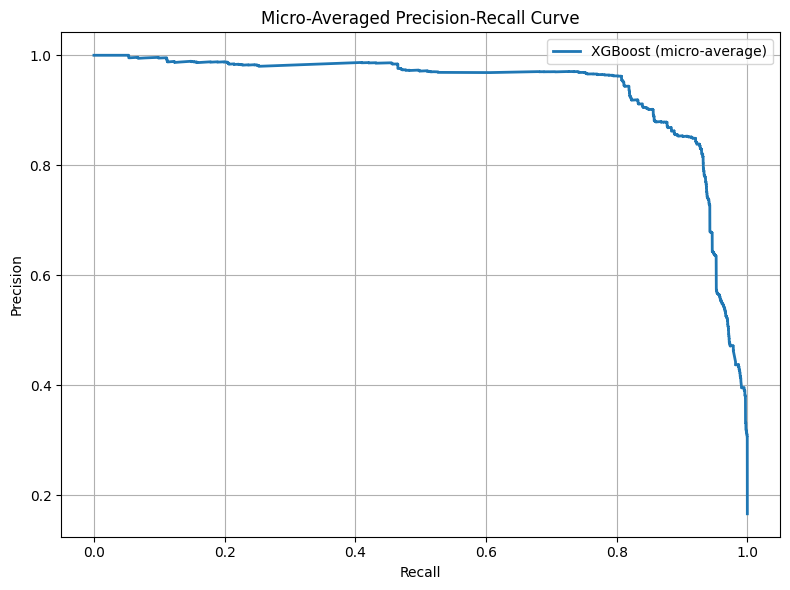

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_test_bin = label_binarize(y_test, classes=np.arange(len(target_labels)))

dtest = xgb.DMatrix(X_test)
y_probs_xgb = xgb_model.predict(dtest)

precision, recall, _ = precision_recall_curve(y_test_bin.ravel(), y_probs_xgb.ravel())

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='XGBoost (micro-average)', linewidth=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Micro-Averaged Precision-Recall Curve')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


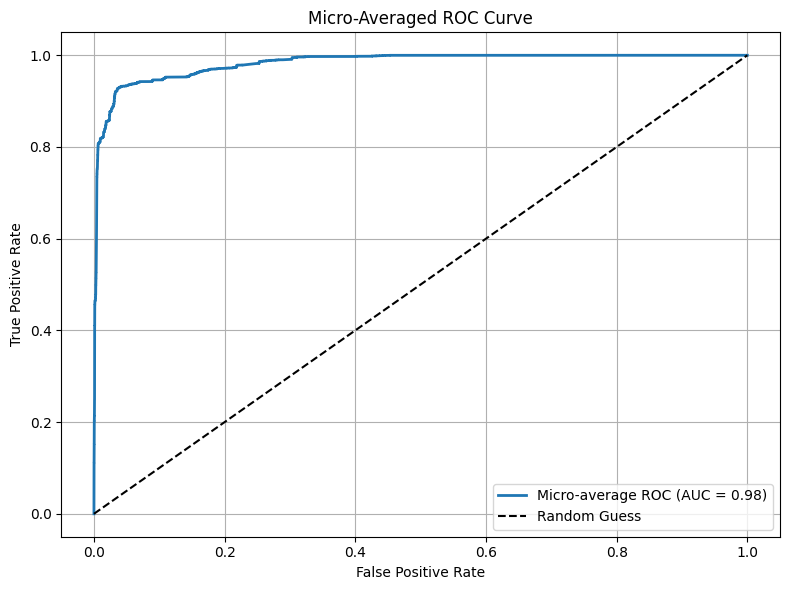

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_probs_xgb.ravel())
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Micro-average ROC (AUC = {roc_auc:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-Averaged ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Save the trained XGBoost model to a file
xgb_model.save_model("xgb_model.json")

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=c30f393d1d92aad0d73349c77f45b4c6faf2b4e98317c85c7d6e4973be79969c
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


**LIME Explainability**

`Resource`:
* https://christophm.github.io/interpretable-ml-book/lime.html

* https://contextual-ai.readthedocs.io/en/latest/tutorials/explainer/tutorial_lime_tabular_explainer.html

`Purpose`: To Make individual predictions more interpretable by identifying which features are contributed most to the models decision for a single applicant.

`How?`

* A `LimeTabularExplainer` is initialized with training data and feature names.

* For testing, LIME troubles the input, it trains a local interpretable model to approximate the XGBoost output.

* The result is a breakdown of top features contributing positively or negatively to the predicted class.

`Importance`

* It makes humans to understand the output more easily
* Supports fair lending by making model behavior transparent
* Facilitates trust with lenders and applicants


**Loan Fit Scores Calculations**

`Purpose`

To show how well an applicant matches each individual loan type e.g. "Express", or "504" rather than just outputting a single class label.

`What's new?`
* Rather than assigning one eligibility label, the pipeline computes a percentage fit across all types of loan

* This is done by passing the model's class probabilities

* Aggregating probabilities for all classes that include a particular loan type

* Normalizing these to sum to 100%

`Usefulness`

* Give an exact view of the applicant's loan compatibility
* Helps underwriters decide between multiple options
* Provides a ranked preference rather than a hard prediction

**Business Stability Score (K-means based)**

`Purpose`
To quantify how `typical` or `stable` a business appears compared to others in the dataset

`What's different?`

* Use KMeans clustering on transformed data to model business behavior groups

* For each test applicant, their feature vector is compared to the center of their assigned cluster.

* The Euclidean distance determines their stability score on a 0-100 scale.

`Why it's meaningful?`

* Provides an unsupervised metric of business reliability.

* Can be used as a alone risk factor or approval modifier.

* Supports more dynamic decision-making logic.

**Dynamic Final Decision Logic**

* Decision rules no longer rely only on the top predicted class.

* Instead, the max loan fit score and business stability score are used together to decide the stability and Max Fit and Decision. These values are manually assigned which can be changed in the future

`Why does this matter?`

* Adds adaptive intelligence to decisions.

* Reflects how real-world underwriters consider both fit and risk.

* Avoids blind rejections and supports edge-case review.

**Note**

* approval_threshold,stability values are assigned after trying different values using trail and error. you can try different values for them and see the changes in Final_Decision count and update the values for approval_threshold,stability.

In [ ]:
df_sampled, _ = train_test_split(balanced_df, train_size=80000, stratify=balanced_df['Eligibility'], random_state=42)

In [ ]:
import warnings
import pandas as pd
import numpy as np
import xgboost as xgb
import lime.lime_tabular
from sklearn.preprocessing import LabelEncoder, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from scipy.spatial.distance import euclidean
from sklearn.cluster import KMeans

warnings.filterwarnings("ignore")

#  Set fixed random seed
SEED = 42
np.random.seed(SEED)

# -----------------------------
# 1. Data Preprocessing
# -----------------------------
df_sampled['Eligibility'] = df_sampled['Eligibility'].astype(str)
df_sampled['Eligibility'] = df_sampled['Eligibility'].str.replace(r"[\[\]']", '', regex=True).str.strip()

#  Ensure "Revenue Growth" Exists
if "Annual Revenue (latest year)" in df_sampled.columns and "Annual Revenue (1 year ago)" in df_sampled.columns:
    df_sampled["Revenue Growth"] = (df_sampled["Annual Revenue (latest year)"] - df_sampled["Annual Revenue (1 year ago)"]) / (df_sampled["Annual Revenue (1 year ago)"] + 1)
else:
    df_sampled["Revenue Growth"] = 0  # Default to 0 if missing

#  Label Encoding for Target
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_sampled['Eligibility'])
target_labels = label_encoder.classes_

df_sampled.drop(columns=['Eligibility', 'Applicant ID', 'Country', 'Location'], inplace=True, errors='ignore')

#  Encode Categorical Features
categorical_cols = df_sampled.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_sampled[col] = le.fit_transform(df_sampled[col].astype(str))
    label_encoders[col] = le

X = df_sampled.copy()
original_feature_names = X.columns.tolist()

# -----------------------------
# 2. Feature Engineering
# -----------------------------
#  Power Transformation (Handles skewed features better)
power_transformer = PowerTransformer()
X_transformed = power_transformer.fit_transform(X)

if X_transformed.shape[1] != len(original_feature_names):
    transformed_feature_names = [f"Feature_{i}" for i in range(X_transformed.shape[1])]
else:
    transformed_feature_names = original_feature_names  # Keep original names if no change

# K-Means Clustering for Similar Loan Patterns
kmeans = KMeans(n_clusters=5, random_state=SEED, n_init=10)
X_cluster = kmeans.fit_predict(X_transformed)

# -----------------------------
# 3. Train-Test Split
# -----------------------------
X_train, X_temp, y_train, y_temp = train_test_split(X_transformed, y, test_size=0.3, stratify=y, random_state=SEED)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.33, stratify=y_temp, random_state=SEED)

# -----------------------------
# 4. Compute Class Weights
# -----------------------------
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# -----------------------------
# 5. XGBoost Model Training
# -----------------------------
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

xgb_params = {
    "objective": "multi:softprob",
    "num_class": len(target_labels),
    "eval_metric": "mlogloss",
    "tree_method": "hist",
    "booster": "gbtree",
    "learning_rate": 0.01,
    "n_estimators": 200,
    "max_depth": 3,
    "min_child_weight": 10,
    "gamma": 5.0,
    "subsample": 0.5,
    "colsample_bytree": 0.6,
    "reg_alpha": 0.2,
    "reg_lambda": 0.7,
    "scale_pos_weight": class_weight_dict,
    "seed": SEED
}

xgb_model = xgb.train(
    xgb_params,
    dtrain,
    num_boost_round=200,
    evals=[(dvalid, "valid")],
    early_stopping_rounds=30,
    verbose_eval=50
)

dtest = xgb.DMatrix(X_test)
y_pred_probs = xgb_model.predict(dtest)
y_pred_test = np.argmax(y_pred_probs, axis=1)

# -----------------------------
# 6. Loan Fit Scores (Normalized to 100%)
# -----------------------------
loan_types = ["Express", "504", "7(a)", "Ineligible"]
loan_fit_df = pd.DataFrame({"Applicant Index": np.arange(len(y_test))})

for loan in loan_types:
    loan_fit_df[loan] = 0

for i in range(len(y_test)):
    probabilities = y_pred_probs[i]
    total_prob = sum(probabilities)

    for loan in loan_types:
        for idx, label in enumerate(target_labels):
            if loan in label:
                loan_fit_df.at[i, loan] += (probabilities[idx] / total_prob) * 100  #  Ensures total sum = 100

loan_fit_df["Predicted Loan Type"] = [target_labels[i] for i in y_pred_test]

# -----------------------------
# 7. Business Stability Score
# -----------------------------
def business_stability(applicant_vector):
    cluster_center = kmeans.cluster_centers_[kmeans.predict([applicant_vector])[0]]
    stability_score = 100 - euclidean(applicant_vector, cluster_center) * 5  # Lower distance = more stable
    return max(0, min(100, stability_score))  # Ensure within 0-100

loan_fit_df["Business Stability Score"] = [
    business_stability(X_transformed[i]) for i in range(len(y_test))
]

# -----------------------------
# 8. Final Decision (Includes Max Fit & Approval Threshold)
# -----------------------------
def final_decision(row):
    max_fit = max(row[loan_types])
    stability = row["Business Stability Score"]

    # Dynamic Approval Threshold Based on Stability
    if stability > 95:
        approval_threshold = 45
    else:
        approval_threshold = 65

    #  Final Decision Logic
    if max_fit >= approval_threshold:
        return "✅ Strong Approval", approval_threshold
    else:
        return "⚠️ Further Review Needed", approval_threshold

#  Add Max Fit Score & Approval Threshold to DataFrame
loan_fit_df["Max Fit Score"] = loan_fit_df[loan_types].max(axis=1)
loan_fit_df[["Final Decision", "Approval Threshold"]] = loan_fit_df.apply(lambda row: pd.Series(final_decision(row)), axis=1)

# -----------------------------
# 9. LIME Explainability for Test Set
# -----------------------------
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train,
    feature_names=transformed_feature_names,
    class_names=target_labels,
    mode="classification"
)

def explain_prediction(index):
    instance = X_test[index].reshape(1, -1)
    prediction_fn = lambda x: xgb_model.predict(xgb.DMatrix(x))
    explanation = lime_explainer.explain_instance(instance[0], prediction_fn, num_features=10)

    print(f"\n📌 Explaining Prediction for Test Instance {index}")
    explanation.show_in_notebook(show_table=True)
    return explanation


explanation = explain_prediction(0)

# -----------------------------
# 10. Output Results
# -----------------------------
print("\n Loan Fit Scores with Final Decision:")
print(loan_fit_df.head(10))


[0]	valid-mlogloss:1.77691
[50]	valid-mlogloss:1.25758
[100]	valid-mlogloss:0.94007
[150]	valid-mlogloss:0.73808
[199]	valid-mlogloss:0.59587

📌 Explaining Prediction for Test Instance 0



 Loan Fit Scores with Final Decision:
   Applicant Index    Express        504       7(a)  Ineligible  \
0                0  42.857199  25.166673  12.925532   33.874908   
1                1  10.919786  15.543726  76.269920    7.546398   
2                2  11.814543  73.214352  71.275087    7.046376   
3                3   4.904948  13.172529  11.726497   79.402176   
4                4  12.503639  43.893570  68.328140    9.339616   
5                5  74.485981  75.313607  10.537490    6.408845   
6                6  72.882185  25.128734  12.813469    8.600036   
7                7  15.350230  72.587008  13.533286   11.753510   
8                8   6.871803  39.308255  14.972002   53.350418   
9                9  75.793750  16.542792   9.261688    9.682277   

  Predicted Loan Type  Business Stability Score  Max Fit Score  \
0             Express                 75.139225      42.857199   
1                7(a)                 70.509389      76.269920   
2           7(a), 504    

In [ ]:
loan_fit_df['Final Decision'].value_counts()

Final Decision
✅ Strong Approval           7050
⚠️ Further Review Needed     870
Name: count, dtype: int64

When evaluating loan eligibility, we implemented a **Loan Fit Score** methodology that normalizes probabilities for each loan type, ensuring the sum remains **100%**. Instead of relying solely on raw probability outputs, we refined the approach using **business stability scores**, which measure how closely an applicant resembles historically successful borrowers. This score is derived from **K-Means clustering** and **Euclidean distance calculations**, ensuring that applicants with similar financial profiles to past successful borrowers are given fair consideration. Additionally, **LIME explainability** is incorporated to provide lenders with an interpretable, case-by-case breakdown of how key financial attributes contribute to an applicant’s eligibility. This means lenders can see why an applicant was recommended for a loan, adding transparency and trust to the decision-making process.

To further strengthen our approval process, we introduced a **dynamic thresholding system** for loan recommendations. This means applicants are not judged solely on their **Loan Fit Score**, but also on their **Business Stability Score**, which reflects their financial reliability compared to similar businesses. Applicants with **higher stability scores require a lower approval threshold**, recognizing their financial resilience. This allows for **real-world flexibility** while maintaining risk management. Instead of an arbitrary cutoff, this system **ensures well-balanced approvals, reducing false negatives** while keeping lending risk in check. With this approach, lenders receive **clear, data-backed recommendations** while maintaining the ability to manually review borderline cases where additional documentation may be required.

**LightGBM for Loan Eligibility Prediction**

Resource: https://lightgbm.readthedocs.io/en/stable/

This section used `LightGBM` to train a high-performing, explainable, and efficient multiclass classifier.

`Why LightGBM?`

* Faster training with large datasets.

* Better performance on sparse and high-dimensional features.

* Handles categorical data efficiently, though label encoding is used here for compatibility with LIME.

`Boosting Type`: dart
* Dropouts are applied during boosting to improve generalization which is similar to neural net dropout

`Regularization`

* `lambda_l1`,`lambda_l2` strong L1 and L2 penalties reduce overfitting
* `min_child_samples` prevents splits on small sample sizes
* `feature_fraction` and `bragging_fraction` are random features and row sampling to enhance diversity.

**Scaling Technique**

`StandardScaler`: LightGBM is robust to different data scales, but standardized inputs improve LIME visualizations and cluster distance calculations.

Resource: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html


**Boosting Configuration**

* Lower learning rate `0.005` and higher iteration count `500`, with early stopping.

* Depth is kept shallow `max_depth=2` to favor generalization over memorization.

**Final Decision Threshold Adjustment**

* The approval threshold is lowered to 55 (vs. 65 in XGBoost) unless the business is highly stable.

* This makes LightGBM slightly more inclusive in borderline cases where applicants show a strong partial fit.

**LIME Integration with LightGBM**

* Works similaraaly as used in XGBoost

* A LimeTabularExplainer is used to interpret the prediction of any single instance.

* The `predict` function passed to LIME uses LightGBM’s `.predict()` method directly, returning probabilities.

**Observation and Evaluation**

* Prediction shows high performance with strong recall across multi-eligible and `Ineligible` classes

* Granular scoring system using loan fit + business stability

**Note**

* approval_threshold,stability values are assigned after trying different values using trail and error. you can try different values for them and see the changes in Final_Decision count and update the values for approval_threshold,stability.

In [ ]:
df_sampled, _ = train_test_split(balanced_df, train_size=80000, stratify=balanced_df['Eligibility'], random_state=42)

In [ ]:
import warnings
import pandas as pd
import numpy as np
import lightgbm as lgb
import lime.lime_tabular
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from scipy.spatial.distance import euclidean
from sklearn.cluster import KMeans

warnings.filterwarnings("ignore")

#  Set a fixed random seed
SEED = 42
np.random.seed(SEED)

# -----------------------------
# 1. Data Preprocessing
# -----------------------------
df_sampled['Eligibility'] = df_sampled['Eligibility'].astype(str)
df_sampled['Eligibility'] = df_sampled['Eligibility'].str.replace(r"[\[\]']", '', regex=True).str.strip()

#  Ensure "Revenue Growth" Exists
if "Annual Revenue (latest year)" in df_sampled.columns and "Annual Revenue (1 year ago)" in df_sampled.columns:
    df_sampled["Revenue Growth"] = (df_sampled["Annual Revenue (latest year)"] - df_sampled["Annual Revenue (1 year ago)"]) / (df_sampled["Annual Revenue (1 year ago)"] + 1)
else:
    df_sampled["Revenue Growth"] = 0  # Default to 0 if missing

#  Label Encoding for Target
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_sampled['Eligibility'])
target_labels = label_encoder.classes_

df_sampled.drop(columns=['Eligibility', 'Applicant ID', 'Country', 'Location'], inplace=True, errors='ignore')

#  Encode Categorical Features
categorical_cols = df_sampled.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_sampled[col] = le.fit_transform(df_sampled[col].astype(str))
    label_encoders[col] = le

X = df_sampled.copy()
original_feature_names = X.columns.tolist()

# -----------------------------
# 2. Feature Engineering
# -----------------------------
# Standardization (Instead of Power Transformation)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  K-Means Clustering for Similar Loan Patterns
kmeans = KMeans(n_clusters=5, random_state=SEED, n_init=10)
X_cluster = kmeans.fit_predict(X_scaled)

# -----------------------------
# 3. Train-Test Split
# -----------------------------
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=SEED)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.33, stratify=y_temp, random_state=SEED)

# -----------------------------
# 4. Compute Class Weights
# -----------------------------
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# -----------------------------
# 5. LightGBM Model Training
# -----------------------------
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_valid, label=y_valid, reference=train_data)

lgb_params = {
    "objective": "multiclass",
    "num_class": len(target_labels),
    "metric": "multi_logloss",
    "learning_rate": 0.005,
    "num_iterations": 500,
    "max_depth": 2,
    "min_child_samples": 100,
    "lambda_l1": 1.0,
    "lambda_l2": 2.0,
    "feature_fraction": 0.3,
    "bagging_fraction": 0.3,
    "bagging_freq": 5,
    "boosting_type": "dart",
    "verbose": -1
}

lgb_model = lgb.train(
    lgb_params,
    train_data,
    valid_sets=[valid_data],
    callbacks=[lgb.early_stopping(30), lgb.log_evaluation(50)]
)

# -----------------------------
# 6. Evaluate Model
# -----------------------------
y_pred_probs = lgb_model.predict(X_test)
y_pred_test = np.argmax(y_pred_probs, axis=1)

print("\n Performance on Test Set:")
print(classification_report(y_test, y_pred_test, target_names=target_labels, zero_division=1))

# -----------------------------
# 7. Loan Fit Scores (Normalized to 100%)
# -----------------------------
loan_types = ["Express", "504", "7(a)", "Ineligible"]
loan_fit_df = pd.DataFrame({"Applicant Index": np.arange(len(y_test))})

for loan in loan_types:
    loan_fit_df[loan] = 0

for i in range(len(y_test)):
    probabilities = y_pred_probs[i]
    total_prob = sum(probabilities)

    for loan in loan_types:
        for idx, label in enumerate(target_labels):
            if loan in label:
                loan_fit_df.at[i, loan] += (probabilities[idx] / total_prob) * 100  # ✅ Ensures total sum = 100

loan_fit_df["Predicted Loan Type"] = [target_labels[i] for i in y_pred_test]

# -----------------------------
# 8. Business Stability Score
# -----------------------------
def business_stability(applicant_vector):
    cluster_center = kmeans.cluster_centers_[kmeans.predict([applicant_vector])[0]]
    stability_score = 100 - euclidean(applicant_vector, cluster_center) * 5
    return max(0, min(100, stability_score))

loan_fit_df["Business Stability Score"] = [
    business_stability(X_scaled[i]) for i in range(len(y_test))
]

# -----------------------------
# 9. Final Decision (Includes Max Fit & Approval Threshold)
# -----------------------------
def final_decision(row):
    max_fit = max(row[loan_types])
    stability = row["Business Stability Score"]

    #  Dynamic Approval Threshold Based on Stability
    if stability > 95:
        approval_threshold = 45
    else:
        approval_threshold = 55

    #  Final Decision Logic
    if max_fit >= approval_threshold:
        return "✅ Strong Approval", approval_threshold
    else:
        return "⚠️ Further Review Needed", approval_threshold

#  Add Max Fit Score & Approval Threshold to DataFrame
loan_fit_df["Max Fit Score"] = loan_fit_df[loan_types].max(axis=1)
loan_fit_df[["Final Decision", "Approval Threshold"]] = loan_fit_df.apply(lambda row: pd.Series(final_decision(row)), axis=1)

# -----------------------------
# 10. LIME Explainability
# -----------------------------
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train,
    feature_names=original_feature_names,
    class_names=target_labels,
    mode="classification"
)

def explain_prediction(index):
    instance = X_test[index].reshape(1, -1)
    prediction_fn = lambda x: lgb_model.predict(x)
    explanation = lime_explainer.explain_instance(instance[0], prediction_fn, num_features=10)

    print(f"\n📌 Explaining Prediction for Test Instance {index}")
    explanation.show_in_notebook(show_table=True)
    return explanation

# Example: Explain the first prediction
explanation = explain_prediction(0)

# -----------------------------
# 11. Output Results
# -----------------------------
print("\n Loan Fit Scores with Final Decision:")
print(loan_fit_df.head(10))


[50]	valid_0's multi_logloss: 1.60905
[100]	valid_0's multi_logloss: 1.5468
[150]	valid_0's multi_logloss: 1.50873
[200]	valid_0's multi_logloss: 1.44168
[250]	valid_0's multi_logloss: 1.37146
[300]	valid_0's multi_logloss: 1.31194
[350]	valid_0's multi_logloss: 1.27472
[400]	valid_0's multi_logloss: 1.20447
[450]	valid_0's multi_logloss: 1.14175
[500]	valid_0's multi_logloss: 1.10039

 Performance on Test Set:
              precision    recall  f1-score   support

         504       0.91      0.82      0.86      1320
504, Express       0.80      1.00      0.89      1320
        7(a)       0.89      0.93      0.91      1320
   7(a), 504       0.84      1.00      0.92      1320
     Express       0.87      0.83      0.85      1320
  Ineligible       1.00      0.64      0.78      1320

    accuracy                           0.87      7920
   macro avg       0.88      0.87      0.87      7920
weighted avg       0.88      0.87      0.87      7920


📌 Explaining Prediction for Test Instance


 Loan Fit Scores with Final Decision:
   Applicant Index    Express        504       7(a)  Ineligible  \
0                0  51.319089  33.183960  21.219190   17.639372   
1                1  23.979948  32.651128  50.329295   15.080620   
2                2  23.652031  60.877005  49.997194   11.629642   
3                3  10.546917  27.198677  22.295104   56.848494   
4                4  20.749480  48.589038  51.412714   14.324112   
5                5  53.719621  62.512264  21.573347   10.794635   
6                6  56.549809  40.295342  22.504200   11.616920   
7                7  28.733008  58.994969  23.660391   15.333500   
8                8  14.258756  52.332629  24.843873   32.048772   
9                9  52.161497  33.837941  20.025056   16.674964   

  Predicted Loan Type  Business Stability Score  Max Fit Score  \
0             Express                 74.824179      51.319089   
1                7(a)                 71.016866      50.329295   
2           7(a), 504    

In [ ]:
loan_fit_df['Final Decision'].value_counts()

Final Decision
✅ Strong Approval           5071
⚠️ Further Review Needed    2849
Name: count, dtype: int64

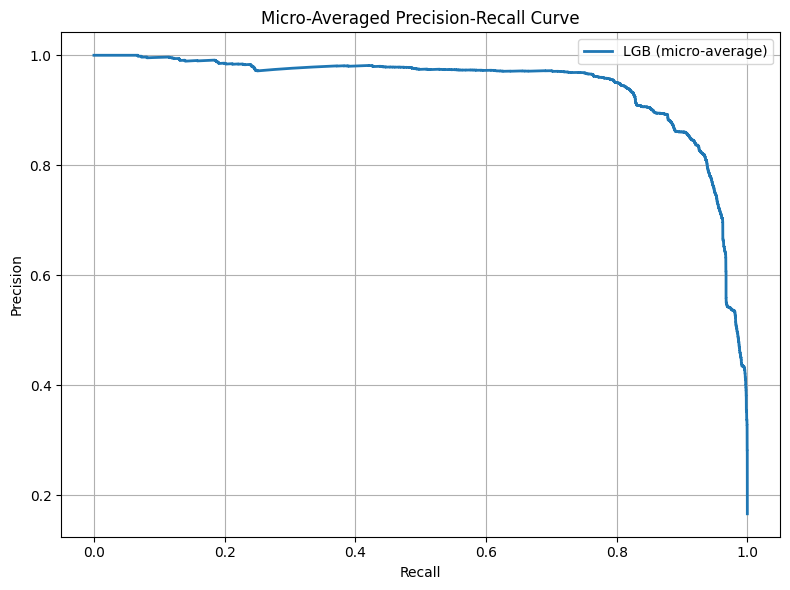

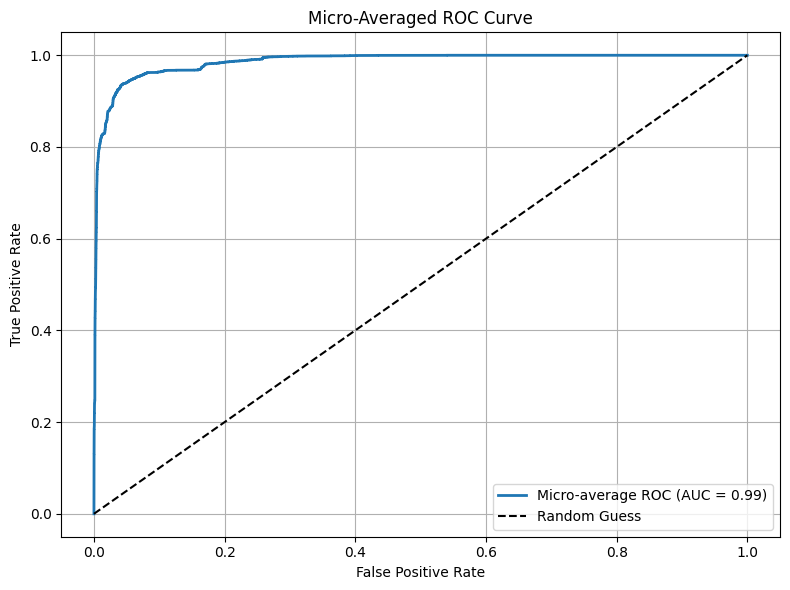

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve

y_test_bin = label_binarize(y_test, classes=np.arange(len(target_labels)))
y_probs_lgb = lgb_model.predict(X_test)

precision, recall, _ = precision_recall_curve(y_test_bin.ravel(), y_probs_lgb.ravel())

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='LGB (micro-average)', linewidth=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Micro-Averaged Precision-Recall Curve')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_probs_lgb.ravel())
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Micro-average ROC (AUC = {roc_auc:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-Averaged ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**TabTransformers(PyTorch) for Lean Eligibility Prediction**

`Resources`

* https://paperswithcode.com/method/tabtransformer

* https://aravindkolli.medium.com/mastering-tabular-data-with-tabtransformer-a-comprehensive-guide-119f6dbf5a79

* https://keras.io/examples/structured_data/tabtransformer/

`Model Architecture`

* A hybrid model designed specifically for tabular data that combines:

1. Embeddings for categorical variables

2. Transformer encoder layers to capture feature interactions

3. A fully connected MLP for final classification

`Why it's unique`

* Captures complex relationships between categorical fields via attention.

* Avoids one-hot encoding and handles high-cardinality features efficiently.

* Learns contextual feature representations, just like in NLP transformers.

`Embeddings + Attention Mechanism`

* Categorical features are embedded into dense vectors.

* These embeddings are passed through multi-head self-attention layers.

* Resulting representations are averaged and combined with numeric projections.

* Final decisions are made by a deep MLP classifier.

`Advanced Optimizer`

`Resources`
* https://pytorch.org/docs/stable/generated/torch.optim.RAdam.html
* https://pytorch.org/docs/stable/generated/torch.optim.lr_scheduler.CosineAnnealingLR.html

`Why?`

* Uses `RAdam` (Rectified Adam) for more stable training on small batches.

* Wrapped with Lookahead, which improves convergence and robustness.

* Combined with cosine annealing learning rate scheduling for smooth learning rate decay.

`Training Mechanism`

* Loss used `CrossEntropyLoss` with class weights for handling label imbalance.

* Implements early stopping with patience = 5 epochs.

* Reports both loss and accuracy during training and validation phases.

`Evaulation and Observation`

* Uses softmax probabilities to enable post-hoc analysis (e.g., loan fit scores).

* Accuracy reaches ~93%, with balanced performance across complex label combinations.

* Output probabilities are used to compute fit scores for each core loan type (`"7(a)", "504", "Express", "Ineligible"`).

* Scores are normalized to 100% to indicate applicant alignment with loan types.

* KMeans clustering is reused to score applicant stability based on proximity to similar business patterns.

* Thresholds have been increased slightly (compared to LightGBM) to reflect more conservative deep model confidence.

`Note`

* approval_threshold,stability values are assigned after trying different values using trail and error. you can try different values for them and see the changes in Final_Decision count and update the values for approval_threshold,stability.


In [ ]:
df_sampled, _ = train_test_split(balanced_df, train_size=80000, stratify=balanced_df['Eligibility'], random_state=42)

In [ ]:
import warnings
import pandas as pd
import numpy as np
import ast
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
import torch_optimizer as optim  # Provides RAdam and Lookahead

# For learning rate scheduling
from torch.optim.lr_scheduler import CosineAnnealingLR

warnings.filterwarnings("ignore")

###########################################
# 1. Data Preparation and Sampling
###########################################
def safe_eval(val):
    try:
        return str(ast.literal_eval(val)) if isinstance(val, str) else str(val)
    except (ValueError, SyntaxError):
        return str(val)

# Assume updated_df is already loaded in your environment.
# Apply safe_eval on the 'Eligibility' column.
balanced_df['Eligibility'] = balanced_df['Eligibility'].apply(safe_eval)

# Sample 50,000 rows from updated_df using stratification on 'Eligibility'
df_sampled, _ = train_test_split(balanced_df, train_size=50000,
                                 stratify=balanced_df['Eligibility'], random_state=42)

###########################################
# 2. Preprocessing
###########################################
# Clean and preprocess the target column "Eligibility"
df_sampled['Eligibility'] = df_sampled['Eligibility'].astype(str)
df_sampled['Eligibility'] = df_sampled['Eligibility'].str.replace(r"[\[\]']", '', regex=True)
df_sampled['Eligibility'] = df_sampled['Eligibility'].str.strip()

# Encode target column
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(df_sampled['Eligibility'])
num_classes = len(target_encoder.classes_)

# Drop columns not used for modeling
df_sampled.drop(columns=['Eligibility', 'Applicant ID', 'Country', 'Location'], inplace=True, errors='ignore')

# Identify categorical columns (assumed to be of type object) and numeric columns.
cat_cols = [col for col in df_sampled.columns if df_sampled[col].dtype == 'object']
num_cols = [col for col in df_sampled.columns if col not in cat_cols]

#  Ensure "Revenue Growth" Exists
if "Annual Revenue (latest year)" in df_sampled.columns and "Annual Revenue (1 year ago)" in df_sampled.columns:
    df_sampled["Revenue Growth"] = (df_sampled["Annual Revenue (latest year)"] - df_sampled["Annual Revenue (1 year ago)"]) / (df_sampled["Annual Revenue (1 year ago)"] + 1)
else:
    df_sampled["Revenue Growth"] = 0


# Label encode categorical columns (for embedding layers)
cat_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df_sampled[col] = le.fit_transform(df_sampled[col].astype(str))
    cat_encoders[col] = le

# Scale numeric columns using StandardScaler
scaler = StandardScaler()
df_sampled[num_cols] = scaler.fit_transform(df_sampled[num_cols])

X = df_sampled.copy()
X_scaled = scaler.fit_transform(X)


# Prepare features: separate numeric and categorical parts.
X_numeric = df_sampled[num_cols].values.astype(np.float32)
X_cat = df_sampled[cat_cols].values.astype(np.int64)

kmeans = KMeans(n_clusters=5, random_state=SEED, n_init=10)
X_cluster = kmeans.fit_predict(X_scaled)


###########################################
# 3. Train-Test-Validation Split
###########################################
X_num_train, X_num_temp, X_cat_train, X_cat_temp, y_train, y_temp = train_test_split(
    X_numeric, X_cat, y, test_size=0.25, stratify=y, random_state=42
)
X_num_val, X_num_test, X_cat_val, X_cat_test, y_val, y_test = train_test_split(
    X_num_temp, X_cat_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42
)

###########################################
# 4. Create PyTorch Dataset and DataLoader
###########################################
class TabularDataset(Dataset):
    def __init__(self, x_numeric, x_cat, y):
        self.x_numeric = torch.tensor(x_numeric, dtype=torch.float32)
        self.x_cat = torch.tensor(x_cat, dtype=torch.long)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.x_numeric[idx], self.x_cat[idx], self.y[idx]

train_dataset = TabularDataset(X_num_train, X_cat_train, y_train)
val_dataset   = TabularDataset(X_num_val, X_cat_val, y_val)
test_dataset  = TabularDataset(X_num_test, X_cat_test, y_test)

batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

###########################################
# 5. Define the TabTransformer Model (Reduced complexity & higher dropout)
###########################################
class TabTransformer(nn.Module):
    def __init__(self, num_numeric, cat_dims, cat_emb_dim=8, transformer_depth=2,
                 nhead=2, mlp_hidden_dims=[128, 64], num_classes=2, dropout=0.7):
        """
        Args:
          num_numeric: Number of numeric features.
          cat_dims: List with number of unique values for each categorical column.
          cat_emb_dim: Embedding dimension for categorical features.
          transformer_depth: Number of transformer encoder layers.
          nhead: Number of attention heads.
          mlp_hidden_dims: List with hidden dimensions for the final MLP.
          num_classes: Number of target classes.
          dropout: Dropout rate.
        """
        super(TabTransformer, self).__init__()
        self.num_cat = len(cat_dims)
        # Create an embedding layer for each categorical column.
        self.cat_embeddings = nn.ModuleList([nn.Embedding(dim, cat_emb_dim) for dim in cat_dims])

        # Transformer encoder for processing the categorical embeddings.
        encoder_layer = nn.TransformerEncoderLayer(d_model=cat_emb_dim, nhead=nhead, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=transformer_depth)

        # Project numeric features to the same embedding dimension.
        self.numeric_proj = nn.Linear(num_numeric, cat_emb_dim)

        # Build the final MLP classifier.
        mlp_input_dim = cat_emb_dim * 2  # concatenated numeric and categorical representations
        layers = []
        for hidden_dim in mlp_hidden_dims:
            layers.append(nn.Linear(mlp_input_dim, hidden_dim))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout))
            mlp_input_dim = hidden_dim
        layers.append(nn.Linear(mlp_input_dim, num_classes))
        self.mlp = nn.Sequential(*layers)

    def forward(self, x_numeric, x_cat):
        # Embed each categorical column.
        cat_embeds = [emb(x_cat[:, i]) for i, emb in enumerate(self.cat_embeddings)]
        # Stack embeddings: shape becomes [batch_size, num_cat, cat_emb_dim]
        cat_embeds = torch.stack(cat_embeds, dim=1)

        # Transformer encoder expects (sequence_length, batch_size, embedding_dim)
        cat_embeds = cat_embeds.transpose(0, 1)  # shape: [num_cat, batch_size, cat_emb_dim]
        transformer_out = self.transformer_encoder(cat_embeds)
        # Aggregate the transformer outputs (e.g., by taking the mean)
        cat_out = transformer_out.mean(dim=0)  # shape: [batch_size, cat_emb_dim]

        # Process numeric features.
        num_out = self.numeric_proj(x_numeric)  # shape: [batch_size, cat_emb_dim]

        # Concatenate numeric and categorical representations.
        combined = torch.cat([num_out, cat_out], dim=1)  # shape: [batch_size, 2 * cat_emb_dim]
        out = self.mlp(combined)
        return out

# Compute unique counts for each categorical column.
cat_dims = [int(df_sampled[col].nunique()) for col in cat_cols]
num_numeric = X_numeric.shape[1]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TabTransformer(num_numeric=num_numeric,
                       cat_dims=cat_dims,
                       cat_emb_dim=8,
                       transformer_depth=2,
                       nhead=2,
                       mlp_hidden_dims=[128, 64],
                       num_classes=num_classes,
                       dropout=0.7)
model.to(device)

###########################################
# 6. Training Setup with RAdam + Lookahead & Scheduler
###########################################
# Compute class weights for handling imbalance.
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)

# Use RAdam as the base optimizer and wrap it with Lookahead from torch_optimizer.
base_optimizer = optim.RAdam(model.parameters(), lr=3e-4, weight_decay=1e-5)
optimizer = optim.Lookahead(base_optimizer, k=5, alpha=0.5)

num_epochs = 15

# Set up a cosine annealing scheduler.
scheduler = CosineAnnealingLR(optimizer, T_max=num_epochs)



###########################################
# 7. Training Loop with Early Stopping
###########################################
best_val_loss = float('inf')
patience = 5
trigger_times = 0
best_model_state = None

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct = 0
    total = 0
    for x_num, x_cat, labels in train_loader:
        x_num, x_cat, labels = x_num.to(device), x_cat.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(x_num, x_cat)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * x_num.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_loss /= total
    train_acc = correct / total

    # Validation phase
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for x_num, x_cat, labels in val_loader:
            x_num, x_cat, labels = x_num.to(device), x_cat.to(device), labels.to(device)
            outputs = model(x_num, x_cat)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * x_num.size(0)
            _, preds = torch.max(outputs, 1)
            correct_val += (preds == labels).sum().item()
            total_val += labels.size(0)
    val_loss /= total_val
    val_acc = correct_val / total_val

    print(f"Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    # Step the scheduler
    scheduler.step()

    # Early stopping check
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        trigger_times = 0
        best_model_state = model.state_dict()
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print("Early stopping triggered!")
            model.load_state_dict(best_model_state)
            break

###########################################
# 8. Final Evaluation on Test Set
###########################################
def evaluate_model(dataloader, dataset_name):
    model.eval()
    all_preds = []
    all_labels = []
    all_probs = []
    with torch.no_grad():
        for x_num, x_cat, labels in dataloader:
            x_num, x_cat, labels = x_num.to(device), x_cat.to(device), labels.to(device)
            outputs = model(x_num, x_cat)
            probs = torch.softmax(outputs, dim=1)  # Convert logits to probabilities
            _, preds = torch.max(probs, 1)

            all_probs.extend(probs.cpu().numpy())  # Store probabilities
            all_preds.extend(preds.cpu().numpy())  # Store predicted labels
            all_labels.extend(labels.cpu().numpy())  # Store actual labels

    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)
    all_probs = np.array(all_probs)

    print(f"\n {dataset_name} Set Performance:")
    print(classification_report(all_labels, all_preds, target_names=target_encoder.classes_))

    return all_preds, all_probs, all_labels  # Return for later use

#  Generate Predictions for All Splits
y_train_preds, y_train_probs, y_train_labels = evaluate_model(train_loader, "Train")
y_val_preds, y_val_probs, y_val_labels = evaluate_model(val_loader, "Validation")
y_test_preds, y_test_probs, y_test_labels = evaluate_model(test_loader, "Test")

# 7. Loan Fit Scores (Normalized to 100%)
# -----------------------------
# Ensure `y_test` exists and corresponds to predictions
loan_types = ["Express", "504", "7(a)", "Ineligible"]
loan_fit_df = pd.DataFrame({"Applicant Index": np.arange(len(y_test))})

for loan in loan_types:
    loan_fit_df[loan] = 0

#  Use the generated y_test_probs instead of missing y_pred_probs
for i in range(len(y_test)):
    probabilities = y_test_probs[i]  # Use corrected probabilities
    total_prob = sum(probabilities)

    for loan in loan_types:
        for idx, label in enumerate(target_encoder.classes_):  # Ensure correct class labels
            if loan in label:
                loan_fit_df.at[i, loan] += (probabilities[idx] / total_prob) * 100  # Normalize sum to 100%

#  Use y_test_preds instead of missing y_pred_test
loan_fit_df["Predicted Loan Type"] = [target_encoder.classes_[i] for i in y_test_preds]

# -----------------------------
# 8. Business Stability Score
# -----------------------------
def business_stability(applicant_vector):
    cluster_center = kmeans.cluster_centers_[kmeans.predict([applicant_vector])[0]]
    stability_score = 100 - euclidean(applicant_vector, cluster_center) * 5
    return max(0, min(100, stability_score))

loan_fit_df["Business Stability Score"] = [
    business_stability(X_scaled[i]) for i in range(len(y_test))
]

# -----------------------------
# 9. Final Decision (Includes Max Fit & Approval Threshold)
# -----------------------------
def final_decision(row):
    max_fit = max(row[loan_types])
    stability = row["Business Stability Score"]

    #  Dynamic Approval Threshold Based on Stability
    if stability > 95:
        approval_threshold = 50
    else:
        approval_threshold = 70

    #  Final Decision Logic
    if max_fit >= approval_threshold:
        return "✅ Strong Approval", approval_threshold
    else:
        return "⚠️ Further Review Needed", approval_threshold

# Add Max Fit Score & Approval Threshold to DataFrame
loan_fit_df["Max Fit Score"] = loan_fit_df[loan_types].max(axis=1)
loan_fit_df[["Final Decision", "Approval Threshold"]] = loan_fit_df.apply(lambda row: pd.Series(final_decision(row)), axis=1)

# -----------------------------
# 10. LIME Explainability
# -----------------------------

# Example: Explain the first prediction

# -----------------------------
# 11. Output Results
# -----------------------------
print("\n Loan Fit Scores with Final Decision:")
print(loan_fit_df.head(10))


Epoch 1/15: Train Loss: 1.8231, Train Acc: 0.1668 | Val Loss: 1.7895, Val Acc: 0.1785
Epoch 2/15: Train Loss: 1.8010, Train Acc: 0.1816 | Val Loss: 1.7703, Val Acc: 0.2425
Epoch 3/15: Train Loss: 1.7703, Train Acc: 0.2118 | Val Loss: 1.7140, Val Acc: 0.4550
Epoch 4/15: Train Loss: 1.6731, Train Acc: 0.2991 | Val Loss: 1.4607, Val Acc: 0.6011
Epoch 5/15: Train Loss: 1.3986, Train Acc: 0.4527 | Val Loss: 0.9703, Val Acc: 0.7529
Epoch 6/15: Train Loss: 1.0839, Train Acc: 0.5836 | Val Loss: 0.6304, Val Acc: 0.8420
Epoch 7/15: Train Loss: 0.8671, Train Acc: 0.6737 | Val Loss: 0.4587, Val Acc: 0.8862
Epoch 8/15: Train Loss: 0.7347, Train Acc: 0.7308 | Val Loss: 0.3595, Val Acc: 0.9072
Epoch 9/15: Train Loss: 0.6522, Train Acc: 0.7699 | Val Loss: 0.3026, Val Acc: 0.9189
Epoch 10/15: Train Loss: 0.5938, Train Acc: 0.7926 | Val Loss: 0.2709, Val Acc: 0.9242
Epoch 11/15: Train Loss: 0.5566, Train Acc: 0.8084 | Val Loss: 0.2524, Val Acc: 0.9264
Epoch 12/15: Train Loss: 0.5370, Train Acc: 0.8148 |

In [ ]:
loan_fit_df.head(10)

Applicant Index    Express        504       7(a)  Ineligible  \
0                0   0.019761   0.273252   0.652752   99.054344   
1                1  98.589569  98.334752   0.335205    0.045848   
2                2   0.752014  96.784483  75.603352    0.630005   
3                3  49.056773  96.772261  17.143163    1.389538   
4                4  92.611007   0.002498   0.124298    7.262437   
5                5   0.390338  41.735925  61.310493   18.261578   
6                6   0.837155   0.011843  51.249833   47.901966   
7                7   0.157649   3.703822  84.385557   14.190422   
8                8   1.539506   1.212994  22.177108   75.136436   
9                9   0.463736  97.553611  86.172159    0.253811   

  Predicted Loan Type  Business Stability Score  Max Fit Score  \
0          Ineligible                 76.191696      99.054344   
1        504, Express                 71.832213      98.589569   
2           7(a), 504                 76.913168      96.784483   
3        504, Express                 76.602708      96.772261   
4             Express                 76.128469      92.611007   
5                7(a)                 77.595277      61.310493   
6                7(a)                 63.624381      51.249833   
7                7(a)                 75.157586      84.385557   
8          Ineligible                 73.728125      75.136436   
9           7(a), 504                 76.808103      97.553611   

             Final Decision  Approval Threshold  
0         ✅ Strong Approval                  70  
1         ✅ Strong Approval                  70  
2         ✅ Strong Approval                  70  
3         ✅ Strong Approval                  70  
4         ✅ Strong Approval                  70  
5  ⚠️ Further Review Needed                  70  
6  ⚠️ Further Review Needed                  70  
7         ✅ Strong Approval                  70  
8         ✅ Strong Approval                  70  
9         ✅ Strong Approval                  70

In [ ]:
loan_fit_df['Final Decision'].value_counts()

Final Decision
✅ Strong Approval           2980
⚠️ Further Review Needed     145
Name: count, dtype: int64

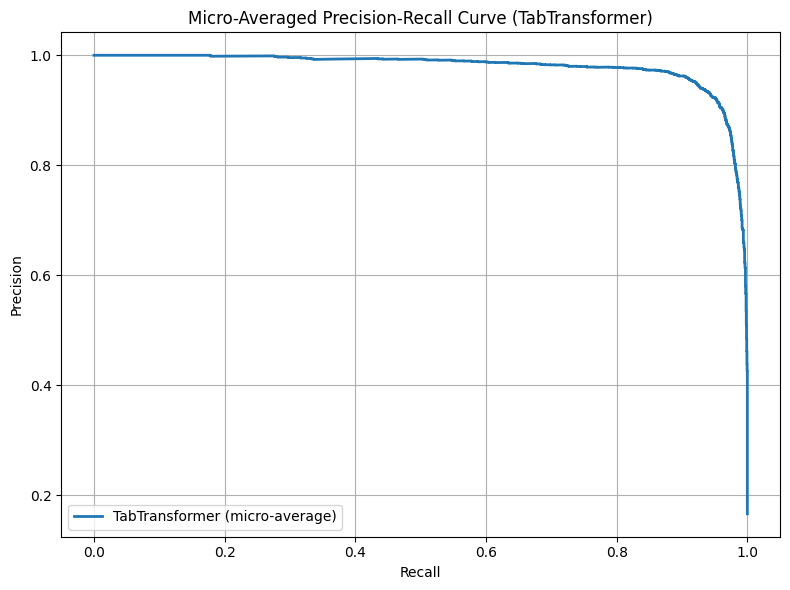

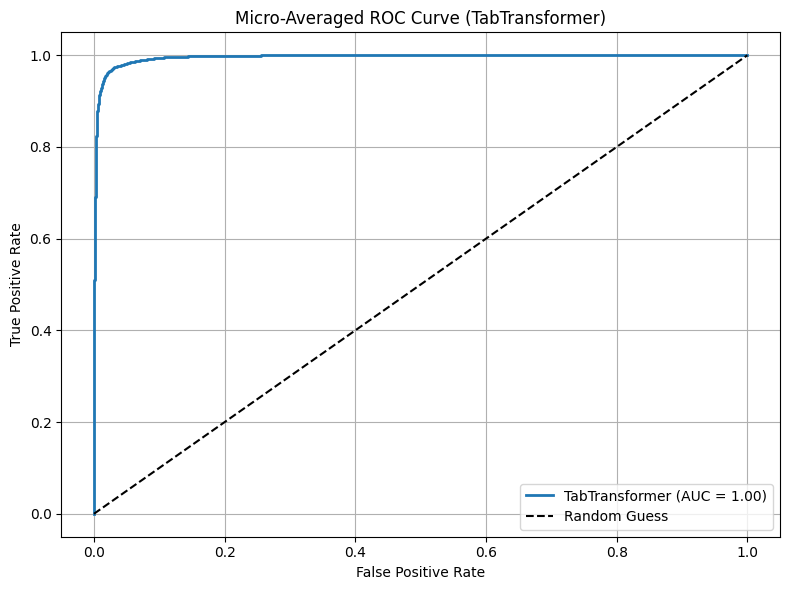

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt

n_classes = len(target_encoder.classes_)
y_test_bin = label_binarize(y_test_labels, classes=np.arange(n_classes))
y_probs_tab = y_test_probs

# -------------------------------
# Precision-Recall Curve (Micro-Averaged)
# -------------------------------
precision, recall, _ = precision_recall_curve(y_test_bin.ravel(), y_probs_tab.ravel())

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='TabTransformer (micro-average)', linewidth=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Micro-Averaged Precision-Recall Curve (TabTransformer)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------
# ROC Curve (Micro-Averaged)
# -------------------------------
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_probs_tab.ravel())
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'TabTransformer (AUC = {roc_auc:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-Averaged ROC Curve (TabTransformer)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Loan Eligibility Prediction using XGBoost, LightGBM, and Neural Networks

This section demonstrates the implementation of loan eligibility prediction using a combination of machine learning models: **XGBoost**, **LightGBM**, and **TabTransformer** (a neural network-based model). The goal is to improve prediction accuracy by using ensemble methods, specifically **weighted averaging** and **stacking** (meta-learner). Below is an explanation of the approach used, followed by the Python code.

## Why Multiple Models?

- **XGBoost**: Known for its strong performance in gradient boosting, XGBoost is a tree-based model that excels in handling large datasets, offering robust performance even with sparse or missing data.  
  - **Resource**: [XGBoost Documentation](https://xgboost.readthedocs.io/en/stable/)

- **LightGBM**: LightGBM is another gradient boosting framework that is faster and more memory-efficient than traditional gradient boosting algorithms. It also handles categorical features better and performs well on large datasets.  
  - **Resource**: [LightGBM Documentation](https://lightgbm.readthedocs.io/en/stable/)

- **TabTransformer**: A deep learning-based model that processes tabular data using transformer architecture. It is particularly good at handling categorical data without needing extensive preprocessing like label encoding.  
  - **Resource**: [TabTransformer Paper](https://arxiv.org/abs/2012.06678)  

By combining these models, we aim to leverage the strengths of each one. The ensemble approach of **weighted averaging** and **stacking** further boosts performance by aggregating predictions from multiple models.

## Steps:

### 1. Data Preprocessing:
- **Label Encoding**: The target variable `Eligibility` is label-encoded into integers to be used by the models.
- **Feature Engineering**: Additional features like `High_DSCR`, `Low_DSCR`, `Debt_to_Income_Ratio`, and `Revenue_Growth` are computed to improve model performance.
- **Power Transformation**: To handle skewed features, `PowerTransformer` is applied to normalize the data.

### 2. Train-Test Split:
- The dataset is split into training, validation, and test sets using `train_test_split` from Scikit-learn.

### 3. Model Training:
- **XGBoost** and **LightGBM** are trained using their respective parameters. The objective is multiclass classification, as the target has multiple categories (loan types).

### 4. Ensemble Learning:
- The predictions from **XGBoost**, **LightGBM**, and **TabTransformer** are combined using **weighted averaging** to create a more robust final prediction.

### 5. Stacking (Meta-Learner):
- A **Logistic Regression** model is trained on the predictions of the three base models (**XGBoost**, **LightGBM**, and **TabTransformer**). This meta-model further improves performance by learning how to combine the predictions from the base models effectively.

## Resources for Models:

- **XGBoost Documentation**:  
  [XGBoost Official Docs](https://xgboost.readthedocs.io/en/stable/)
  
- **LightGBM Documentation**:  
  [LightGBM Official Docs](https://lightgbm.readthedocs.io/en/stable/)
  
- **TabTransformer Paper**:  
  [TabTransformer: Transformers for Tabular Data](https://arxiv.org/abs/2012.06678)


In [ ]:
df_sampled, _ = train_test_split(balanced_df, train_size=80000, stratify=balanced_df['Eligibility'], random_state=42)

In [ ]:
import warnings
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgb
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import LogisticRegression

warnings.filterwarnings("ignore")

# -----------------------------
# 1. Data Preprocessing
# -----------------------------
df_sampled['Eligibility'] = df_sampled['Eligibility'].astype(str)
df_sampled['Eligibility'] = df_sampled['Eligibility'].str.replace(r"[\[\]']", '', regex=True).str.strip()

#  Label Encoding for Target
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_sampled['Eligibility'])
target_labels = label_encoder.classes_

df_sampled.drop(columns=['Eligibility', 'Applicant ID', 'Country', 'Location'], inplace=True, errors='ignore')

#  Encode Categorical Features
categorical_cols = df_sampled.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_sampled[col] = le.fit_transform(df_sampled[col].astype(str))
    label_encoders[col] = le

X = df_sampled.copy()

# -----------------------------
# 2. Feature Engineering (Optimized)
# -----------------------------
X["High_DSCR"] = (X["DSCR (latest year)"] > 1.5).astype(int)
X["Low_DSCR"] = (X["DSCR (latest year)"] < 1.0).astype(int)
X["Debt_to_Income_Ratio"] = X["Business Debt (latest year)"] / (X["Annual Revenue (latest year)"] + 1)
X["Revenue_Growth"] = (X["Annual Revenue (latest year)"] - X["Annual Revenue (1 year ago)"]) / (X["Annual Revenue (1 year ago)"] + 1)

#  Power Transformation (Handles skewed features better)
power_transformer = PowerTransformer()
X_transformed = power_transformer.fit_transform(X)

# -----------------------------
# 3. Train-Test Split
# -----------------------------
X_train, X_temp, y_train, y_temp = train_test_split(X_transformed, y, test_size=0.3, stratify=y, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.33, stratify=y_temp, random_state=42)

# -----------------------------
# 4. Compute Class Weights
# -----------------------------
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# -----------------------------
# 5. XGBoost Training
# -----------------------------
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

xgb_params = {
    "objective": "multi:softprob",
    "num_class": len(target_labels),
    "eval_metric": "mlogloss",
    "tree_method": "hist",
    "booster": "gbtree",
    "learning_rate": 0.005,
    "n_estimators": 200,
    "max_depth": 3,
    "min_child_weight": 10,
    "gamma": 5.0,
    "subsample": 0.6,
    "colsample_bytree": 0.6,
    "reg_alpha": 0.2,
    "reg_lambda": 0.8,
}

xgb_model = xgb.train(
    xgb_params,
    dtrain,
    num_boost_round=200,
    evals=[(dvalid, "valid")],
    early_stopping_rounds=30,
    verbose_eval=50
)

# -----------------------------
# 6. LightGBM Training
# -----------------------------
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_valid, label=y_valid, reference=train_data)

lgb_params = {
    "objective": "multiclass",
    "num_class": len(target_labels),
    "metric": "multi_logloss",
    "learning_rate": 0.005,
    "num_iterations": 500,
    "max_depth": 2,
    "min_child_samples": 100,
    "lambda_l1": 0.5,
    "lambda_l2": 1.0,
    "feature_fraction": 0.5,
    "bagging_fraction": 0.6,
    "bagging_freq": 5,
    "boosting_type": "gbdt",
    "verbose": -1
}

lgb_model = lgb.train(
    lgb_params,
    train_data,
    valid_sets=[valid_data],
    callbacks=[lgb.early_stopping(30), lgb.log_evaluation(50)]
)

# -----------------------------
# 7. TabTransformer Training
# -----------------------------
class TabTransformer(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(TabTransformer, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)
        self.dropout = nn.Dropout(0.6)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        return self.fc3(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tab_model = TabTransformer(X_train.shape[1], len(target_labels)).to(device)

# -----------------------------
# 8. Ensemble: Weighted Averaging
# -----------------------------
dtest = xgb.DMatrix(X_test)
y_pred_xgb = xgb_model.predict(dtest)
y_pred_lgb = lgb_model.predict(X_test)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_pred_tab = tab_model(X_test_tensor).detach().cpu().numpy()

# Weighted Averaging
weights = np.array([0.3, 0.3, 0.4])
y_pred_ensemble = (weights[0] * y_pred_xgb + weights[1] * y_pred_lgb + weights[2] * y_pred_tab)
y_pred_final = np.argmax(y_pred_ensemble, axis=1)

print("\n Weighted Averaging Performance:")
print(classification_report(y_test, y_pred_final, target_names=target_labels))

# -----------------------------
# 9. Stacking (Meta-Learner)
# -----------------------------
stack_train = np.column_stack([xgb_model.predict(dtrain), lgb_model.predict(X_train), tab_model(torch.tensor(X_train, dtype=torch.float32).to(device)).detach().cpu().numpy()])
stack_test = np.column_stack([y_pred_xgb, y_pred_lgb, y_pred_tab])

meta_model = LogisticRegression()
meta_model.fit(stack_train, y_train)
y_pred_stack = meta_model.predict(stack_test)

print("\n Stacked Model Performance:")
print(classification_report(y_test, y_pred_stack, target_names=target_labels))



[0]	valid-mlogloss:1.78449
[50]	valid-mlogloss:1.48023
[100]	valid-mlogloss:1.25675
[150]	valid-mlogloss:1.08013
[199]	valid-mlogloss:0.94593
Training until validation scores don't improve for 30 rounds
[50]	valid_0's multi_logloss: 1.45171
[100]	valid_0's multi_logloss: 1.21275
[150]	valid_0's multi_logloss: 1.0353
[200]	valid_0's multi_logloss: 0.899182
[250]	valid_0's multi_logloss: 0.789332
[300]	valid_0's multi_logloss: 0.702097
[350]	valid_0's multi_logloss: 0.630682
[400]	valid_0's multi_logloss: 0.570199
[450]	valid_0's multi_logloss: 0.518916
[500]	valid_0's multi_logloss: 0.476115
Did not meet early stopping. Best iteration is:
[500]	valid_0's multi_logloss: 0.476115

 Weighted Averaging Performance:
              precision    recall  f1-score   support

         504       0.80      0.78      0.79      1320
504, Express       0.87      0.83      0.85      1320
        7(a)       0.82      0.82      0.82      1320
   7(a), 504       0.71      0.95      0.81      1320
     Expr

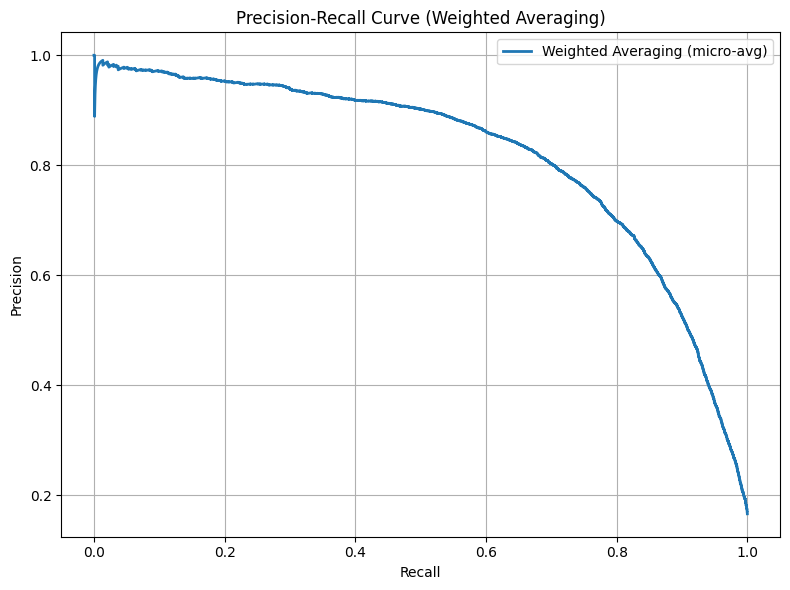

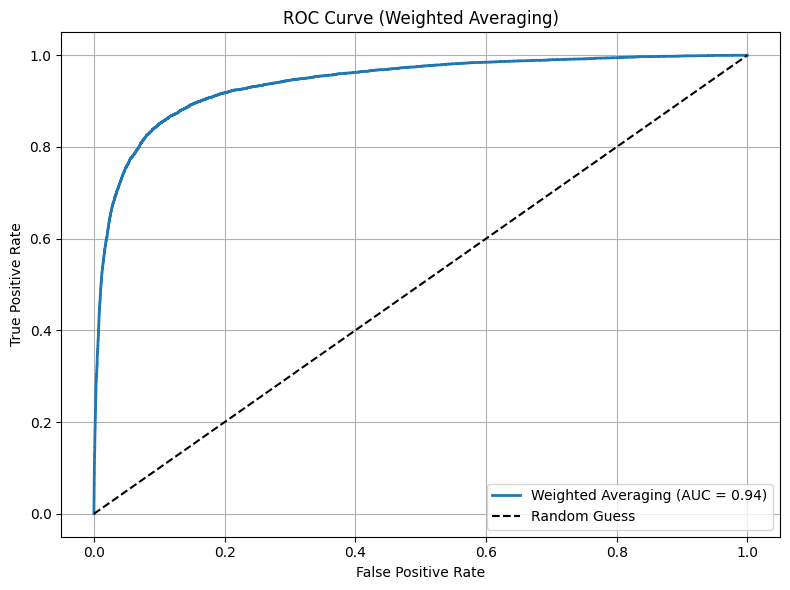

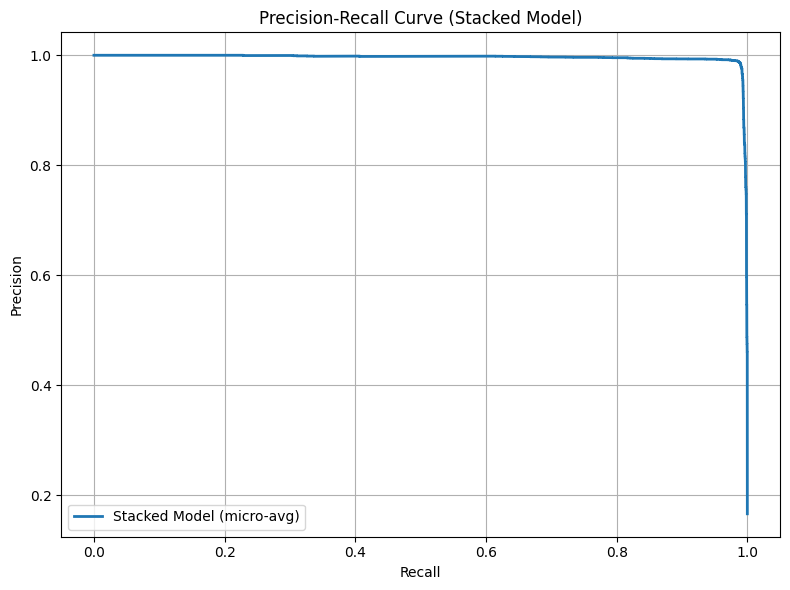

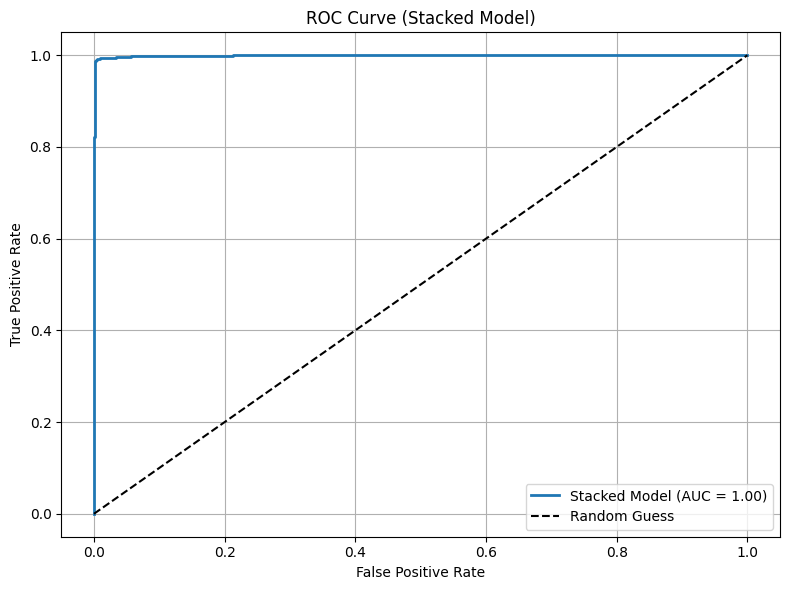

In [ ]:
# Number of classes
n_classes = len(target_labels)

# Binarize the true labels for micro-averaging
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# --------------------------------------------
# Micro-Averaged Precision-Recall: Weighted Averaging
# --------------------------------------------
precision_avg, recall_avg, _ = precision_recall_curve(y_test_bin.ravel(), y_pred_ensemble.ravel())

plt.figure(figsize=(8, 6))
plt.plot(recall_avg, precision_avg, label='Weighted Averaging (micro-avg)', linewidth=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Weighted Averaging)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --------------------------------------------
# Micro-Averaged ROC Curve: Weighted Averaging
# --------------------------------------------
fpr_avg, tpr_avg, _ = roc_curve(y_test_bin.ravel(), y_pred_ensemble.ravel())
roc_auc_avg = auc(fpr_avg, tpr_avg)

plt.figure(figsize=(8, 6))
plt.plot(fpr_avg, tpr_avg, label=f'Weighted Averaging (AUC = {roc_auc_avg:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Weighted Averaging)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --------------------------------------------
# Micro-Averaged Precision-Recall: Stacked Model
# --------------------------------------------
# Get probability estimates from meta model
y_pred_stack_probs = meta_model.predict_proba(stack_test)

precision_stack, recall_stack, _ = precision_recall_curve(y_test_bin.ravel(), y_pred_stack_probs.ravel())

plt.figure(figsize=(8, 6))
plt.plot(recall_stack, precision_stack, label='Stacked Model (micro-avg)', linewidth=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Stacked Model)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --------------------------------------------
# Micro-Averaged ROC Curve: Stacked Model
# --------------------------------------------
fpr_stack, tpr_stack, _ = roc_curve(y_test_bin.ravel(), y_pred_stack_probs.ravel())
roc_auc_stack = auc(fpr_stack, tpr_stack)

plt.figure(figsize=(8, 6))
plt.plot(fpr_stack, tpr_stack, label=f'Stacked Model (AUC = {roc_auc_stack:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Stacked Model)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


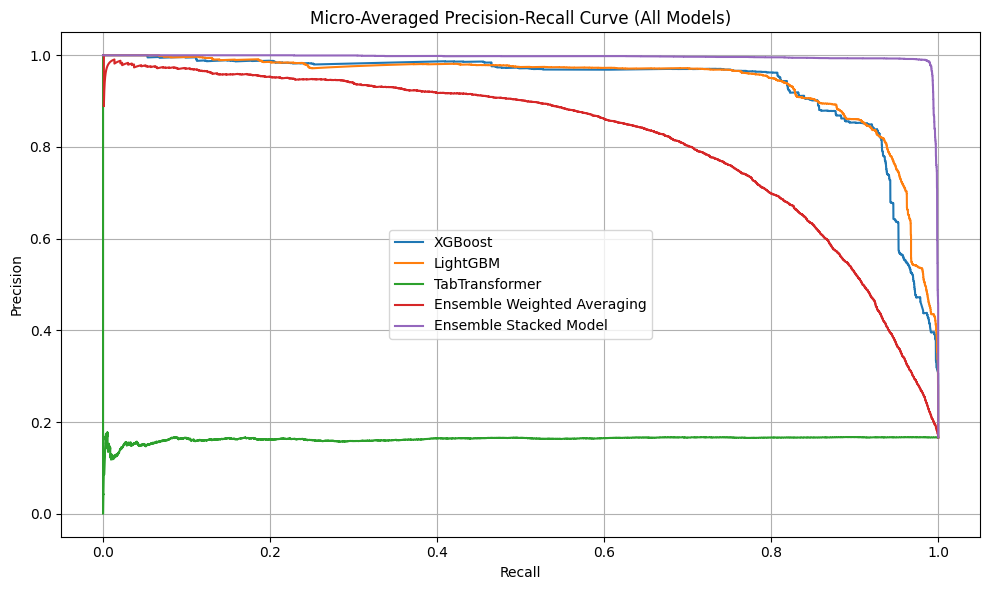

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# NN
#y_bin_nn = label_binarize(y_test[:len(y_probs_nn)], classes=np.arange(len(target_labels)))
#prec_nn, rec_nn, _ = precision_recall_curve(y_bin_nn.ravel(), y_probs_nn.ravel())
#plt.plot(rec_nn, prec_nn, label='Neural Network')

# XGB
y_bin_xgb = label_binarize(y_test, classes=np.arange(len(target_labels)))
prec_xgb, rec_xgb, _ = precision_recall_curve(y_bin_xgb.ravel(), y_probs_xgb.ravel())
plt.plot(rec_xgb, prec_xgb, label='XGBoost')

# LGB
prec_lgb, rec_lgb, _ = precision_recall_curve(y_bin_xgb.ravel(), y_probs_lgb.ravel())
plt.plot(rec_lgb, prec_lgb, label='LightGBM')

# TabTransformer
y_bin_tab = label_binarize(y_test[:len(y_probs_tab)], classes=np.arange(len(target_labels)))
prec_tab, rec_tab, _ = precision_recall_curve(y_bin_tab.ravel(), y_probs_tab.ravel())
plt.plot(rec_tab, prec_tab, label='TabTransformer')

# Weighted
prec_ens, rec_ens, _ = precision_recall_curve(y_bin_xgb.ravel(), y_pred_ensemble.ravel())
plt.plot(rec_ens, prec_ens, label='Ensemble Weighted Averaging')

# Stacked
prec_stack, rec_stack, _ = precision_recall_curve(y_bin_xgb.ravel(), y_pred_stack_probs.ravel())
plt.plot(rec_stack, prec_stack, label='Ensemble Stacked Model')

# Final plot settings
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Micro-Averaged Precision-Recall Curve (All Models)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


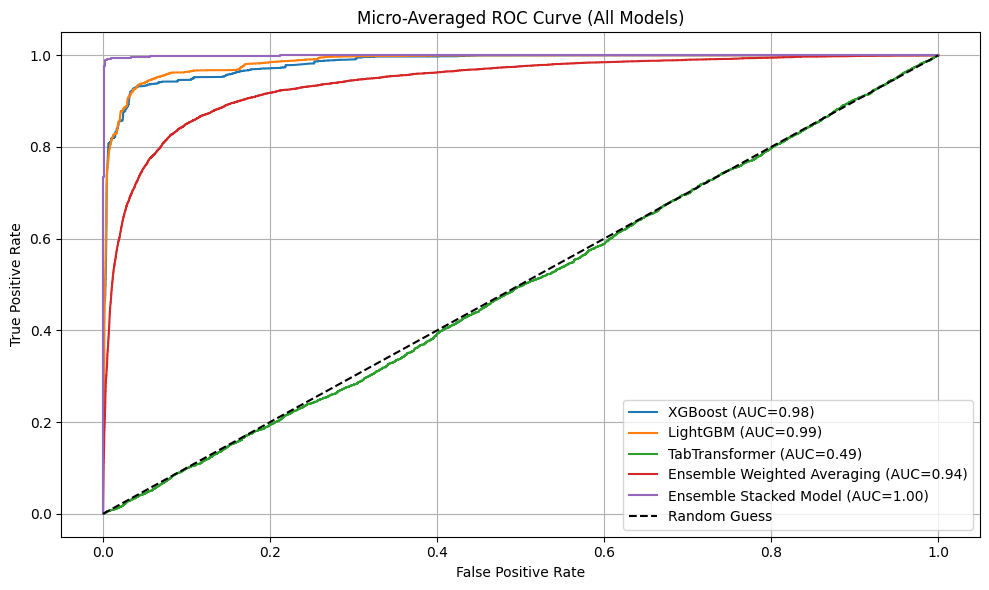

In [ ]:
plt.figure(figsize=(10, 6))

# NN
#fpr_nn, tpr_nn, _ = roc_curve(y_bin_nn.ravel(), y_probs_nn.ravel())
#auc_nn = auc(fpr_nn, tpr_nn)
#plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC={auc_nn:.2f})')

# XGB
fpr_xgb, tpr_xgb, _ = roc_curve(y_bin_xgb.ravel(), y_probs_xgb.ravel())
auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC={auc_xgb:.2f})')

# LGB
fpr_lgb, tpr_lgb, _ = roc_curve(y_bin_xgb.ravel(), y_probs_lgb.ravel())
auc_lgb = auc(fpr_lgb, tpr_lgb)
plt.plot(fpr_lgb, tpr_lgb, label=f'LightGBM (AUC={auc_lgb:.2f})')

# TabTransformer
fpr_tab, tpr_tab, _ = roc_curve(y_bin_tab.ravel(), y_probs_tab.ravel())
auc_tab = auc(fpr_tab, tpr_tab)
plt.plot(fpr_tab, tpr_tab, label=f'TabTransformer (AUC={auc_tab:.2f})')

# Weighted
fpr_ens, tpr_ens, _ = roc_curve(y_bin_xgb.ravel(), y_pred_ensemble.ravel())
auc_ens = auc(fpr_ens, tpr_ens)
plt.plot(fpr_ens, tpr_ens, label=f'Ensemble Weighted Averaging (AUC={auc_ens:.2f})')

# Stacked
fpr_stack, tpr_stack, _ = roc_curve(y_bin_xgb.ravel(), y_pred_stack_probs.ravel())
auc_stack = auc(fpr_stack, tpr_stack)
plt.plot(fpr_stack, tpr_stack, label=f'Ensemble Stacked Model (AUC={auc_stack:.2f})')

# Final plot settings
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-Averaged ROC Curve (All Models)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
